<a href="https://colab.research.google.com/github/Abhishek92kumar/LJMU/blob/main/exploring_PubLayNet_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubLayNet Dataset

PubLayNet is a large dataset of document images from PubMed Central Open Access Subset. Each document’s layout is annotated with both bounding boxes and polygonal segmentations.

The dataset is open sourced by IBM Research Australia and is [available to download freely](https://developer.ibm.com/exchanges/data/all/publaynet/) on the IBM Developer [Data Asset Exchange](http://ibm.biz/data-exchange). 

This notebook can be found on [GitHub](https://github.com/ibm-aur-nlp/PubLayNet) and [Watson Studio](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/43cb95d9-6c3e-479c-a189-8c9ff3524ec1/view?access_token=bb8ce645cf114b5f5512ae2eb9c7badcf0927f313e8f76b8138d0701289484e6).

## Download and Extract the Example Dataset

Since the dataset is huge (~100GB), here we will be downloading a small subset of the data and extract it. 

In [1]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fname = 'examples.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

6461141

In [3]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [4]:
# Verifying the file was extracted properly
data_path = "examples/"
path.exists(data_path)

True

## Visualizing the Data

In this section, we visualize the annotations file by overlaying it on the underlying image.

In [5]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

In [6]:
# Function to viz the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Draw segmentation
        draw.polygon(annotation['segmentation'][0],
                     fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,))
        # Draw bbox
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        # Draw label
        w, h = draw.textsize(text=samples['categories'][annotation['category_id'] - 1]['name'],
                             font=font)
        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
    return np.array(image)

In [7]:
# Parse the JSON file and read all the images and labels
with open('examples/samples.json', 'r') as fp:
    samples = json.load(fp)
# Index images
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "examples/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)

In [8]:
# image = '/content/examples/PMC3576793_00004.jpg'


In [9]:
# image['annotations']
# /content/examples/PMC4954804_00001.jpg

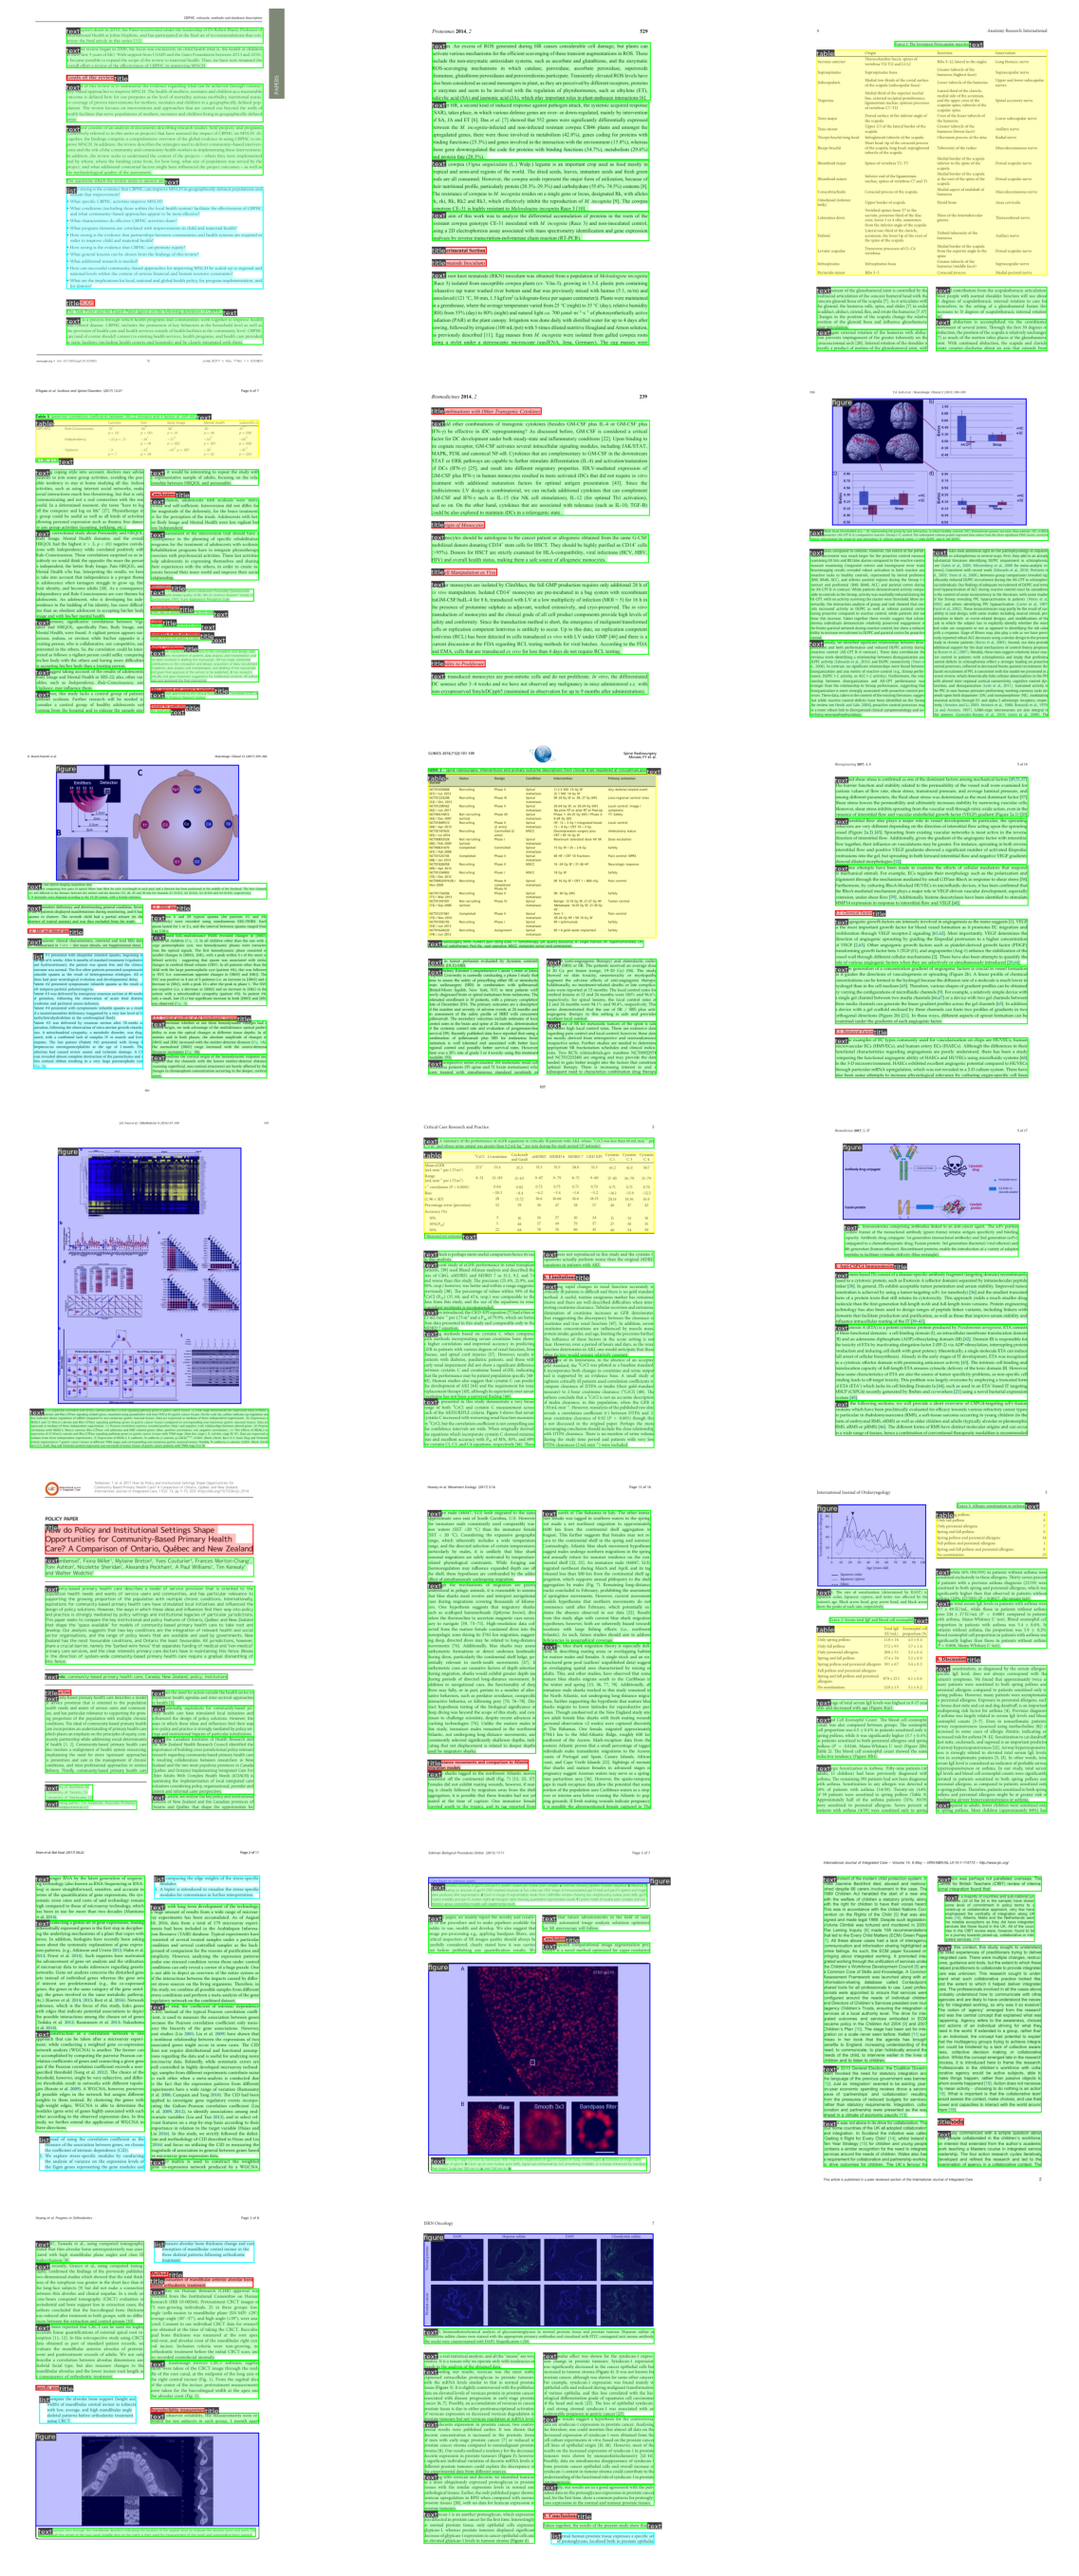

In [10]:
# Visualize annotations
font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
fig=plt.figure(figsize=(16, 100)) 
for i, (_, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(len(images), 3, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)

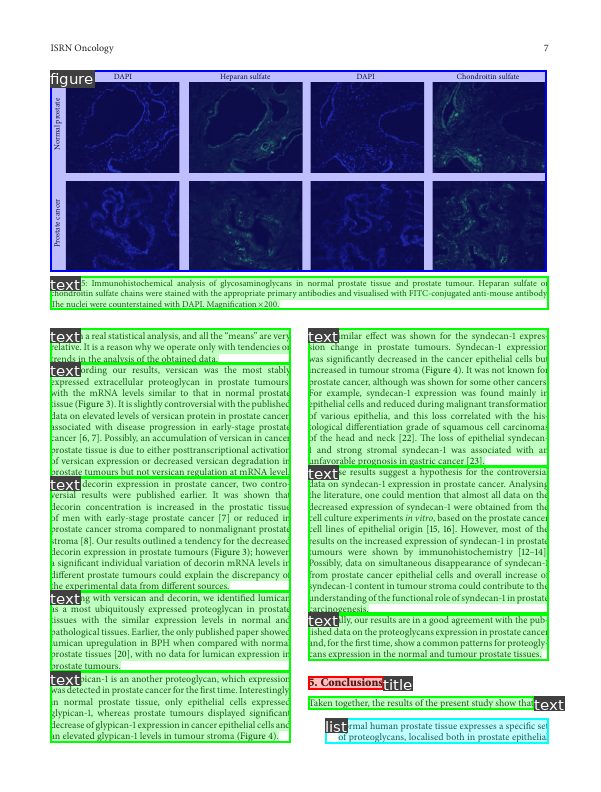

In [11]:
img

In [12]:
images.items()

dict_items([(348952, {'file_name': 'examples/PMC5491943_00004.jpg', 'annotations': [{'segmentation': [[121.89, 41.8, 549.88, 41.8, 549.88, 52.31, 547.09, 52.31, 547.09, 64.31, 287.15, 64.31, 287.15, 76.3, 121.89, 76.3, 121.89, 65.8, 121.89, 65.8, 121.89, 53.8, 121.89, 41.8]], 'area': 11581.494498000131, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 41.8, 427.99, 34.5], 'category_id': 1, 'id': 3398552}, {'segmentation': [[121.89, 83.47, 549.83, 83.47, 549.83, 93.97, 549.44, 93.97, 549.44, 107.46, 549.8, 107.46, 549.8, 117.97, 425.74, 117.97, 425.74, 129.97, 121.89, 129.97, 121.89, 119.46, 121.89, 107.46, 121.89, 95.47, 121.89, 83.47]], 'area': 18405.733143000223, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 83.47, 427.94, 46.5], 'category_id': 1, 'id': 3398553}, {'segmentation': [[121.89, 163.31, 547.09, 163.31, 547.09, 175.51, 549.74, 175.51, 549.74, 187.71, 549.84, 187.71, 549.84, 198.22, 547.09, 198.22, 547.09, 212.1, 549.97, 212.1, 549.97, 222.61, 549.86, 222.61, 549.86, 

# Exploring the training dataset

In [13]:
!pip install webdataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import webdataset as wds
import pprint
import numpy as np
from itertools import islice
import torch
pp = pprint.PrettyPrinter(indent=2, compact=True, width=150, depth=2).pprint
cache_dir = None

### Loading PubLayNet Training Dataset from the Web

Datasets are accessible directly over the web. However, you can also store them locally, in network file systems, or in any object store.

In [15]:
# Downloading the dataset's labels json file
urls =  "https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/labels.tar.gz"

Datasets are just `.tar` archives containing training files. For PubLayNet, each training sample consists of a `.png` file and a corresponding `.json` file.

In [16]:
# Downloading and extacting the labels json files
!curl {urls} | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313M  100  313M    0     0  15.2M      0  0:00:20  0:00:20 --:--:-- 15.5M


In [17]:
# Loading the train.json
import json
f = open('/content/publaynet/train.json',)
data = json.load(f)
f.close()

In [18]:
# extracting category_name_to_id and thing_classes
thing_classes  = []
category_name_to_id = {}
id_num =[]
id_to_category_name ={}
data_annotations=[]
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
print(category_name_to_id)
print(thing_classes)

{'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}
['text', 'title', 'list', 'table', 'figure']


In [19]:
# defining id_to_category_name dictionary
id_to_category_name = {v: k for k, v in category_name_to_id.items()}
id_to_category_name

{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}

In [20]:
category  = []
category_name_to_id = {}
data_annotations=[]

for i in data['annotations']:
    category.append(id_to_category_name[i['category_id']] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# category

In [21]:
# length of the trainig datasets 
len(category)

3263046

In [22]:
# checing the value counts for all the category in trining dataset
import pandas as pd
category =pd.Index(category)
category.value_counts()


text      2343356
title      627125
figure     109292
table      102514
list        80759
dtype: int64

<Axes: >

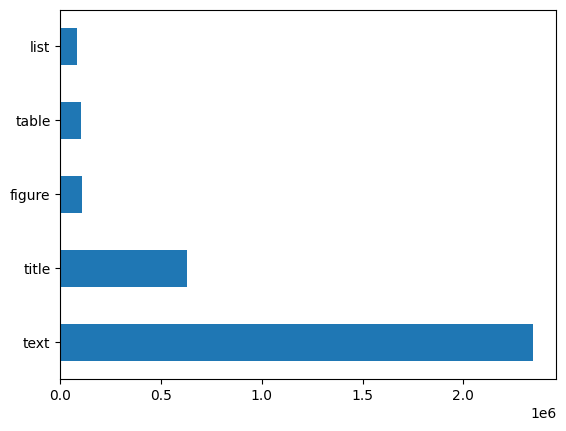

In [23]:
# Plotting a horizontal bargraph fro the value counts 
category.value_counts().plot(kind='barh')


(Text(0.5, 1.08, 'Instance Class Distribution (Training set)'),)

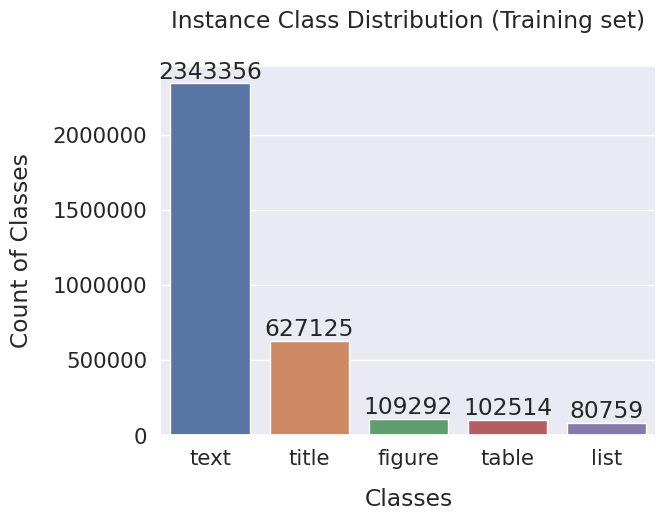

In [24]:
# Plotting a bargraph for all the classes in training dataset
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

ax =sns.barplot(x=category.value_counts().index, y=category.value_counts())
plt.ylabel("Count of Classes", labelpad=14)
plt.xlabel("Classes", labelpad=14)
plt.ticklabel_format(style='plain', axis='y')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

plt.title('Instance Class Distribution (Training set)', y=1.08),

# Exploring the testing dataset

### Loading validation PubLayNet

In [25]:
import json
f = open('/content/publaynet/val.json',)
data = json.load(f)
f.close()

In [26]:
thing_classes  = []
category_name_to_id = {}
id_num =[]
id_to_category_name ={}
data_annotations=[]
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
print(category_name_to_id)
print(thing_classes)

{'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}
['text', 'title', 'list', 'table', 'figure']


In [27]:
id_to_category_name = {v: k for k, v in category_name_to_id.items()}
id_to_category_name

{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}

In [28]:
category  = []
category_name_to_id = {}
data_annotations=[]

for i in data['annotations']:
    category.append(id_to_category_name[i['category_id']] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# category

In [29]:
len(category)

120761

In [30]:
import pandas as pd
category =pd.Index(category)
category.value_counts()


text      88625
title     18801
table      4769
figure     4327
list       4239
dtype: int64

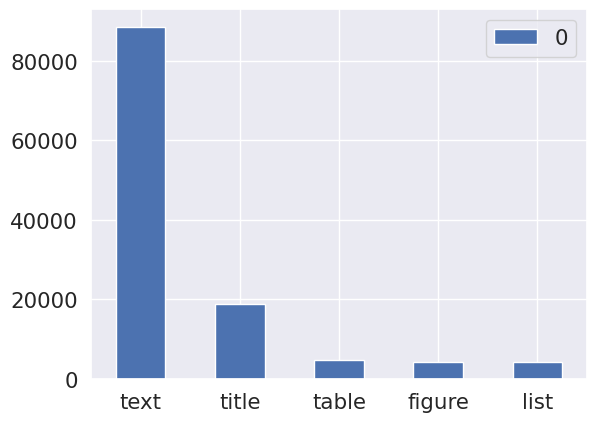

In [31]:
df = pd.DataFrame(category.value_counts())
ax = df.plot.bar(rot=0)

(Text(0.5, 1.08, 'Instance Class Distribution (Validation set)'),)

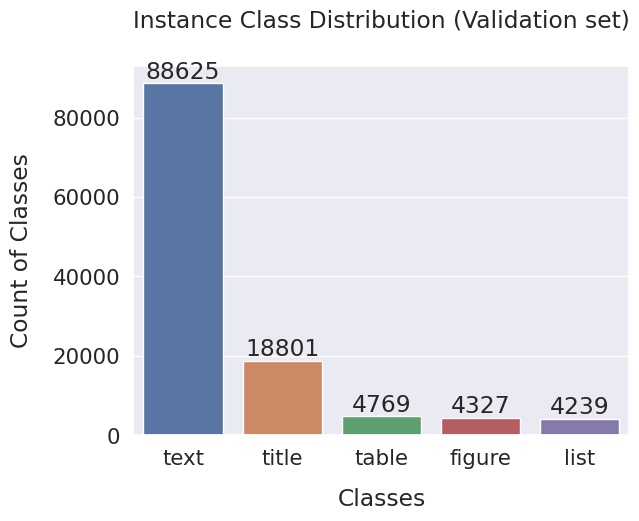

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

ax =sns.barplot(x=category.value_counts().index, y=category.value_counts())
plt.ylabel("Count of Classes", labelpad=14)
plt.xlabel("Classes", labelpad=14)
plt.ticklabel_format(style='plain', axis='y')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

plt.title('Instance Class Distribution (Validation set)', y=1.08),

In [33]:
area  = []
area_to_id = {}
data_annotations=[]

for i in data['annotations']:
    area.append(i['area'] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# area

In [34]:
len(area)

120761

In [35]:
import seaborn as sns
import pandas as pd
bins = [ 0, 32*32, 92*92, float('inf') ]
df = pd.DataFrame(area, columns=['area'])

df['area'] = pd.cut(df['area'] , bins=bins, include_lowest=True)
plt.show()


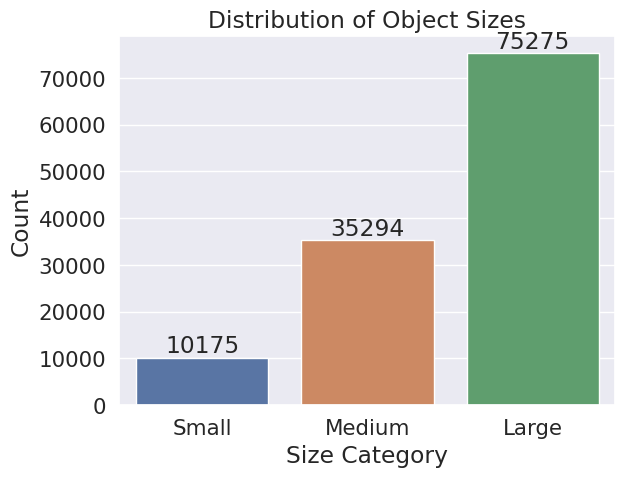

In [36]:
# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

df = pd.DataFrame(area, columns=['area'])

# Categorize the sizes using pd.cut()
df['area'] = pd.cut(df['area'], bins=bins, labels=labels)


# Create a countplot using Seaborn
ax =sns.barplot(x=df['area'].value_counts().index, y=df['area'].value_counts())


# Set the plot title and labels
plt.title('Distribution of Object Sizes')
plt.xlabel('Size Category')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])


# Show the plot
plt.show()

In [37]:
df['area'].value_counts()

Large     75275
Medium    35294
Small     10175
Name: area, dtype: int64

# Creation of Dataframes 

In [38]:
# Converting it to dataframe for better visualization of data
import json


f = open('/content/publaynet/train.json')
dict = json.load(f)
f.close()


from pandas import json_normalize
df = json_normalize(dict['annotations']) 


In [39]:
# Exploring the dataframe
df.head()

segmentation          area  iscrowd  \
0  [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...  13787.433083        0   
1  [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   3266.252634        0   
2  [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   8037.095047        0   
3  [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...  18566.000169        0   
4  [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...  17140.380181        0   

   image_id                             bbox  category_id  id  
0         0   [40.42, 444.87, 251.55, 63.86]            1   0  
1         0  [309.91, 444.91, 251.55, 21.97]            1   1  
2         0   [40.42, 507.66, 251.55, 32.45]            1   2  
3         0    [309.91, 465.8, 251.55, 74.3]            1   3  
4         0   [40.42, 397.09, 521.02, 34.83]            1   4

In [40]:
# dict['annotations']

In [41]:
# Exploring the dataframe
df["area"].head()

0    13787.433083
1     3266.252634
2     8037.095047
3    18566.000169
4    17140.380181
Name: area, dtype: float64

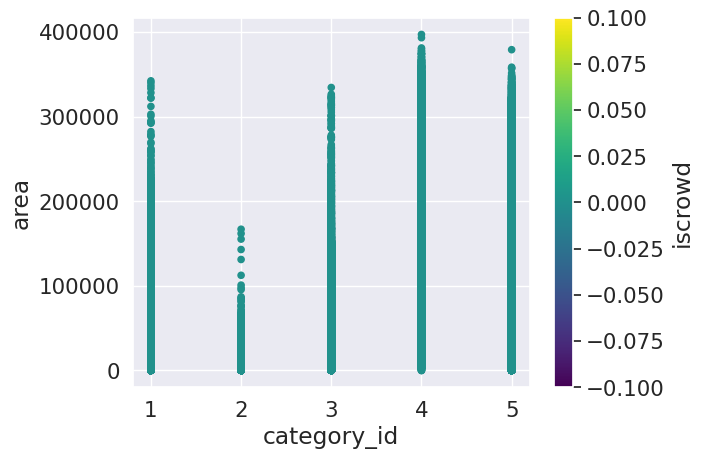

In [42]:
ax2 = df.plot.scatter(x='category_id',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

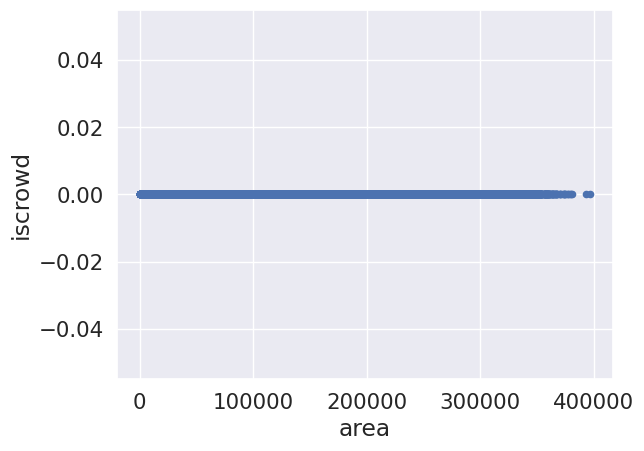

In [43]:
ax2 = df.plot.scatter(x='area',
                      y='iscrowd'
                      # , c='species'
                      # , colormap='viridis'
                      )

In [44]:
df

segmentation          area  \
0        [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...  13787.433083   
1        [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   3266.252634   
2        [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   8037.095047   
3        [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...  18566.000169   
4        [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...  17140.380181   
...                                                    ...           ...   
3263041  [[328.08, 163.62, 542.17, 163.62, 542.17, 175....  60349.788331   
3263042  [[315.1, 468.23, 542.2, 468.23, 542.2, 481.27,...  46676.227587   
3263043  [[328.08, 675.15, 542.23, 675.15, 542.23, 686....  11348.987092   
3263044  [[70.02, 176.74, 149.09, 176.74, 149.09, 191.9...   1204.374589   
3263045  [[315.1, 450.51, 373.76, 450.51, 373.76, 465.7...    893.506519   

         iscrowd  image_id                             bbox  category_id  \
0              0         0   [40.42, 444.87, 251.55, 63.86]            1   
1              0         0  [309.91, 444.91, 251.55, 21.97]            1   
2              0         0   [40.42, 507.66, 251.55, 32.45]            1   
3              0         0    [309.91, 465.8, 251.55, 74.3]            1   
4              0         0   [40.42, 397.09, 521.02, 34.83]            1   
...          ...       ...                              ...          ...   
3263041        0    340390  [315.1, 163.62, 227.14, 270.83]            1   
3263042        0    340390  [315.1, 468.23, 227.16, 205.62]            1   
3263043        0    340390   [315.1, 675.15, 227.18, 50.81]            1   
3263044        0    340390    [70.02, 176.74, 79.07, 15.23]            2   
3263045        0    340390    [315.1, 450.51, 58.66, 15.23]            2   

              id  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
3263041  3311655  
3263042  3311656  
3263043  3311657  
3263044  3311658  
3263045  3311659  

[3263046 rows x 7 columns]

In [45]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'index'})

In [46]:
df

index                                       segmentation  \
0              0  [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...   
1              1  [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   
2              2  [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   
3              3  [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...   
4              4  [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...   
...          ...                                                ...   
3263041  3263041  [[328.08, 163.62, 542.17, 163.62, 542.17, 175....   
3263042  3263042  [[315.1, 468.23, 542.2, 468.23, 542.2, 481.27,...   
3263043  3263043  [[328.08, 675.15, 542.23, 675.15, 542.23, 686....   
3263044  3263044  [[70.02, 176.74, 149.09, 176.74, 149.09, 191.9...   
3263045  3263045  [[315.1, 450.51, 373.76, 450.51, 373.76, 465.7...   

                 area  iscrowd  image_id                             bbox  \
0        13787.433083        0         0   [40.42, 444.87, 251.55, 63.86]   
1         3266.252634        0         0  [309.91, 444.91, 251.55, 21.97]   
2         8037.095047        0         0   [40.42, 507.66, 251.55, 32.45]   
3        18566.000169        0         0    [309.91, 465.8, 251.55, 74.3]   
4        17140.380181        0         0   [40.42, 397.09, 521.02, 34.83]   
...               ...      ...       ...                              ...   
3263041  60349.788331        0    340390  [315.1, 163.62, 227.14, 270.83]   
3263042  46676.227587        0    340390  [315.1, 468.23, 227.16, 205.62]   
3263043  11348.987092        0    340390   [315.1, 675.15, 227.18, 50.81]   
3263044   1204.374589        0    340390    [70.02, 176.74, 79.07, 15.23]   
3263045    893.506519        0    340390    [315.1, 450.51, 58.66, 15.23]   

         category_id       id  
0                  1        0  
1                  1        1  
2                  1        2  
3                  1        3  
4                  1        4  
...              ...      ...  
3263041            1  3311655  
3263042            1  3311656  
3263043            1  3311657  
3263044            2  3311658  
3263045            2  3311659  

[3263046 rows x 8 columns]

In [47]:
# df['category']= df['category_id'].replace({1:'Text',2:'Title',3:'List',4:'Table',5:'Figure'})


In [48]:
df['category']= df['category_id'].replace(id_to_category_name)


In [49]:
df['category']

0           text
1           text
2           text
3           text
4           text
           ...  
3263041     text
3263042     text
3263043     text
3263044    title
3263045    title
Name: category, Length: 3263046, dtype: object

In [50]:
df

index                                       segmentation  \
0              0  [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...   
1              1  [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   
2              2  [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   
3              3  [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...   
4              4  [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...   
...          ...                                                ...   
3263041  3263041  [[328.08, 163.62, 542.17, 163.62, 542.17, 175....   
3263042  3263042  [[315.1, 468.23, 542.2, 468.23, 542.2, 481.27,...   
3263043  3263043  [[328.08, 675.15, 542.23, 675.15, 542.23, 686....   
3263044  3263044  [[70.02, 176.74, 149.09, 176.74, 149.09, 191.9...   
3263045  3263045  [[315.1, 450.51, 373.76, 450.51, 373.76, 465.7...   

                 area  iscrowd  image_id                             bbox  \
0        13787.433083        0         0   [40.42, 444.87, 251.55, 63.86]   
1         3266.252634        0         0  [309.91, 444.91, 251.55, 21.97]   
2         8037.095047        0         0   [40.42, 507.66, 251.55, 32.45]   
3        18566.000169        0         0    [309.91, 465.8, 251.55, 74.3]   
4        17140.380181        0         0   [40.42, 397.09, 521.02, 34.83]   
...               ...      ...       ...                              ...   
3263041  60349.788331        0    340390  [315.1, 163.62, 227.14, 270.83]   
3263042  46676.227587        0    340390  [315.1, 468.23, 227.16, 205.62]   
3263043  11348.987092        0    340390   [315.1, 675.15, 227.18, 50.81]   
3263044   1204.374589        0    340390    [70.02, 176.74, 79.07, 15.23]   
3263045    893.506519        0    340390    [315.1, 450.51, 58.66, 15.23]   

         category_id       id category  
0                  1        0     text  
1                  1        1     text  
2                  1        2     text  
3                  1        3     text  
4                  1        4     text  
...              ...      ...      ...  
3263041            1  3311655     text  
3263042            1  3311656     text  
3263043            1  3311657     text  
3263044            2  3311658    title  
3263045            2  3311659    title  

[3263046 rows x 9 columns]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


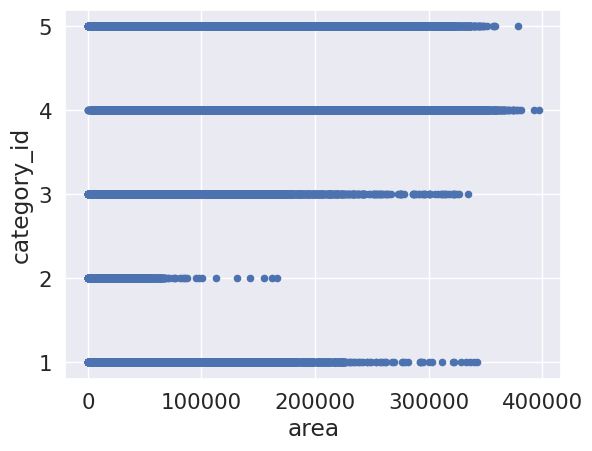

In [51]:
ax2 = df.plot.scatter(x='area',
                      y='category_id'
                      # , c='category'
                      , colormap='viridis'
                      )

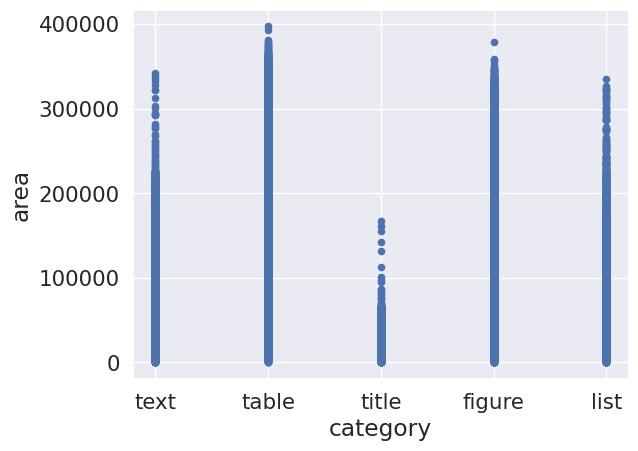

In [52]:
ax2 = df.plot.scatter(y='area',
                      x='category'
                      # , c='category'
                      , colormap='viridis'
                      )

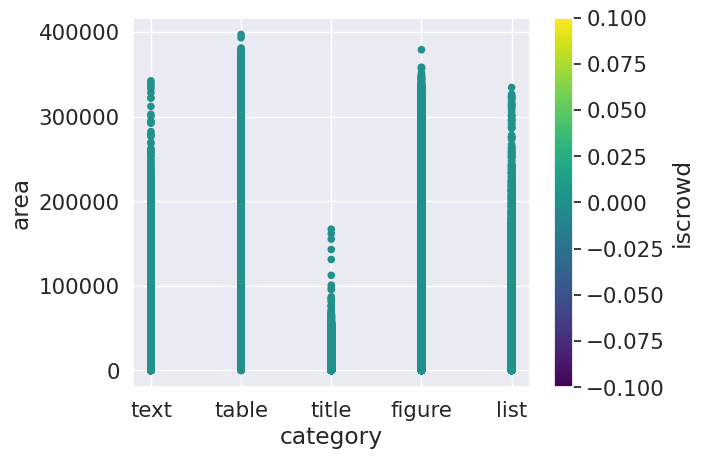

In [53]:
ax2 = df.plot.scatter(x='category',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

In [54]:
# Converting the category names
print(category_name_to_id)
print(id_to_category_name)


{}
{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}


In [55]:
# Exploring the dataframe
df.image_id.value_counts().head()

174626    103
174627    101
174641     90
328610     86
211067     85
Name: image_id, dtype: int64

In [56]:
# Number of images in each pages
df2 = df.pivot_table(index = ['image_id'], aggfunc ='size')
df2.head()

image_id
0    9
1    7
2    8
3    5
4    8
dtype: int64

In [57]:
# Exploring the dataframe
df3 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='size')
(df3).head()

image_id  category
0         figure      1
          table       1
          text        6
          title       1
1         figure      1
dtype: int64

In [58]:
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')
(df4).head()

<ipython-input-58-cca18357adbf>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')


area  category_id  id  index  iscrowd
image_id category                                                
0        figure    121394.999789            5   8      8        0
         table      84042.635616            4   6      6        0
         text       65919.276572            6  15     15        0
         title        212.078943            2   7      7        0
1        figure    161168.468164            5  15     15        0

In [59]:
# Exploring the dataframe
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='count')
df4.head()

area  bbox  category_id  id  index  iscrowd  segmentation
image_id category                                                           
0        figure       1     1            1   1      1        1             1
         table        1     1            1   1      1        1             1
         text         6     6            6   6      6        6             6
         title        1     1            1   1      1        1             1
1        figure       1     1            1   1      1        1             1

In [60]:
# Exploring the dataframe
df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')
df5.head()


<ipython-input-60-6358db86cd9f>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')


area             id      image_id  \
category_id category                                              
1           text      5.686139e+10  3881354289223  398861582911   
2           title     1.653139e+09  1040062777844  106879817535   
3           list      2.598630e+09   131508333371   13515061080   
4           table     9.886050e+09   168903551817   17356666014   
5           figure    1.088447e+10   181699468588   18671403736   

                              index  iscrowd  
category_id category                          
1           text      3824037217421        0  
2           title     1024705680544        0  
3           list       129563678452        0  
4           table      166409941850        0  
5           figure     179016449268        0

In [61]:
# Exploring the dataframe
df.head()

index                                       segmentation          area  \
0      0  [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...  13787.433083   
1      1  [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   3266.252634   
2      2  [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   8037.095047   
3      3  [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...  18566.000169   
4      4  [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...  17140.380181   

   iscrowd  image_id                             bbox  category_id  id  \
0        0         0   [40.42, 444.87, 251.55, 63.86]            1   0   
1        0         0  [309.91, 444.91, 251.55, 21.97]            1   1   
2        0         0   [40.42, 507.66, 251.55, 32.45]            1   2   
3        0         0    [309.91, 465.8, 251.55, 74.3]            1   3   
4        0         0   [40.42, 397.09, 521.02, 34.83]            1   4   

  category  
0     text  
1     text  
2     text  
3     text  
4     text

In [62]:
# Exploring the dataframe in the pivot table
df.pivot(index=['index']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list  table          text  title
index                                             
0            0.0   0.0    0.0  13787.433083    0.0
1            0.0   0.0    0.0   3266.252634    0.0
2            0.0   0.0    0.0   8037.095047    0.0
3            0.0   0.0    0.0  18566.000169    0.0
4            0.0   0.0    0.0  17140.380181    0.0

In [63]:
# Exploring the dataframe in the pivot table
df.pivot(index=['id']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list  table          text  title
id                                                
0            0.0   0.0    0.0  13787.433083    0.0
1            0.0   0.0    0.0   3266.252634    0.0
2            0.0   0.0    0.0   8037.095047    0.0
3            0.0   0.0    0.0  18566.000169    0.0
4            0.0   0.0    0.0  17140.380181    0.0

In [64]:
# Exploring the dataframe in the pivot table
df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)
(df5).drop(["iscrowd", "index","category_id","id"], axis = 1).head()

<ipython-input-64-bcb369c242c0>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)


area
image_id category               
0        figure    121394.999789
         table      84042.635616
         text       65919.276572
         title        212.078943
1        figure    161168.468164

In [65]:
df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)
df5.drop(["iscrowd", "index","category_id","id"], axis = 1)


<ipython-input-65-0a6423c93f4a>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)


area                                               
category         figure list         table           text        title
image_id                                                              
0         121394.999789  0.0  84042.635616   65919.276572   212.078943
1         161168.468164  0.0      0.000000  123845.489396     0.000000
2         150756.610845  0.0      0.000000   98155.964186  1919.125494
3         189165.600000  0.0      0.000000   65576.252488     0.000000
4         183316.146033  0.0      0.000000   80671.584713  1832.643921
...                 ...  ...           ...            ...          ...
340386         0.000000  0.0      0.000000  280834.839907  7013.643315
340387         0.000000  0.0      0.000000  277752.705087  6115.935569
340388         0.000000  0.0      0.000000  273212.676273  8504.120105
340389         0.000000  0.0      0.000000  283747.487013   973.832351
340390         0.000000  0.0      0.000000  282173.465194  2097.881108

[335703 rows x 5 columns]

In [66]:
df


index                                       segmentation  \
0              0  [[52.38, 444.87, 291.97, 444.87, 291.97, 456.4...   
1              1  [[309.91, 444.91, 561.46, 444.91, 561.46, 456....   
2              2  [[52.38, 507.66, 291.97, 507.66, 291.97, 519.1...   
3              3  [[321.87, 465.8, 561.46, 465.8, 561.46, 477.34...   
4              4  [[40.42, 397.09, 561.44, 397.09, 561.44, 405.5...   
...          ...                                                ...   
3263041  3263041  [[328.08, 163.62, 542.17, 163.62, 542.17, 175....   
3263042  3263042  [[315.1, 468.23, 542.2, 468.23, 542.2, 481.27,...   
3263043  3263043  [[328.08, 675.15, 542.23, 675.15, 542.23, 686....   
3263044  3263044  [[70.02, 176.74, 149.09, 176.74, 149.09, 191.9...   
3263045  3263045  [[315.1, 450.51, 373.76, 450.51, 373.76, 465.7...   

                 area  iscrowd  image_id                             bbox  \
0        13787.433083        0         0   [40.42, 444.87, 251.55, 63.86]   
1         3266.252634        0         0  [309.91, 444.91, 251.55, 21.97]   
2         8037.095047        0         0   [40.42, 507.66, 251.55, 32.45]   
3        18566.000169        0         0    [309.91, 465.8, 251.55, 74.3]   
4        17140.380181        0         0   [40.42, 397.09, 521.02, 34.83]   
...               ...      ...       ...                              ...   
3263041  60349.788331        0    340390  [315.1, 163.62, 227.14, 270.83]   
3263042  46676.227587        0    340390  [315.1, 468.23, 227.16, 205.62]   
3263043  11348.987092        0    340390   [315.1, 675.15, 227.18, 50.81]   
3263044   1204.374589        0    340390    [70.02, 176.74, 79.07, 15.23]   
3263045    893.506519        0    340390    [315.1, 450.51, 58.66, 15.23]   

         category_id       id category  
0                  1        0     text  
1                  1        1     text  
2                  1        2     text  
3                  1        3     text  
4                  1        4     text  
...              ...      ...      ...  
3263041            1  3311655     text  
3263042            1  3311656     text  
3263043            1  3311657     text  
3263044            2  3311658    title  
3263045            2  3311659    title  

[3263046 rows x 9 columns]

In [67]:
df6 = pd.DataFrame(df[['area','category']])
df6

area category
0        13787.433083     text
1         3266.252634     text
2         8037.095047     text
3        18566.000169     text
4        17140.380181     text
...               ...      ...
3263041  60349.788331     text
3263042  46676.227587     text
3263043  11348.987092     text
3263044   1204.374589    title
3263045    893.506519    title

[3263046 rows x 2 columns]

In [68]:
df5=df6.copy()

In [69]:
df6['category'].value_counts()

text      2343356
title      627125
figure     109292
table      102514
list        80759
Name: category, dtype: int64

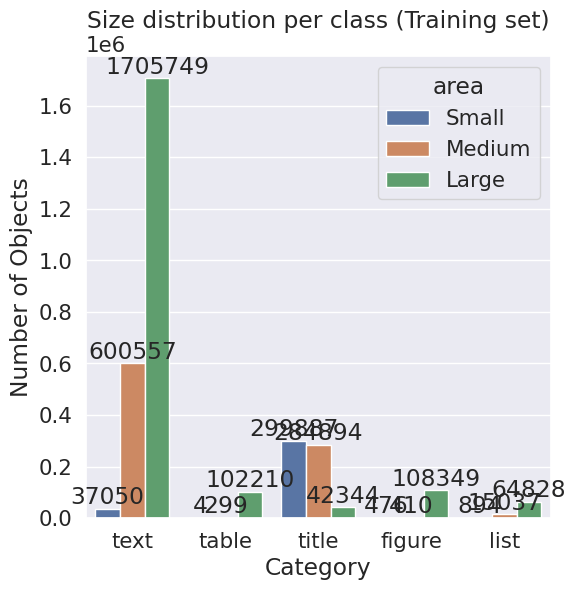

In [70]:
# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Categorize the sizes using pd.cut()
df6['area'] = pd.cut(df6['area'], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(6, 6))

# Create a countplot using Seaborn
ax =sns.countplot(data=df6, x="category", hue="area")


# Set the plot title and labels
plt.title('Size distribution per class (Training set)')
plt.xlabel('Category')
plt.ylabel('Number of Objects')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])
ax.bar_label(ax.containers[1], labels=[f'{x.get_height():.0f}' for x in ax.containers[1]])
ax.bar_label(ax.containers[2], labels=[f'{x.get_height():.0f}' for x in ax.containers[2]])

# Show the plot
plt.show()

In [71]:
df6

area category
0         Large     text
1        Medium     text
2        Medium     text
3         Large     text
4         Large     text
...         ...      ...
3263041   Large     text
3263042   Large     text
3263043   Large     text
3263044  Medium    title
3263045   Small    title

[3263046 rows x 2 columns]

In [72]:
df6["area"].value_counts()

Large     2023480
Medium     901197
Small      338311
Name: area, dtype: int64

In [73]:
df5

area category
0        13787.433083     text
1         3266.252634     text
2         8037.095047     text
3        18566.000169     text
4        17140.380181     text
...               ...      ...
3263041  60349.788331     text
3263042  46676.227587     text
3263043  11348.987092     text
3263044   1204.374589    title
3263045    893.506519    title

[3263046 rows x 2 columns]

In [74]:
df5

area category
0        13787.433083     text
1         3266.252634     text
2         8037.095047     text
3        18566.000169     text
4        17140.380181     text
...               ...      ...
3263041  60349.788331     text
3263042  46676.227587     text
3263043  11348.987092     text
3263044   1204.374589    title
3263045    893.506519    title

[3263046 rows x 2 columns]

In [75]:
df5

area category
0        13787.433083     text
1         3266.252634     text
2         8037.095047     text
3        18566.000169     text
4        17140.380181     text
...               ...      ...
3263041  60349.788331     text
3263042  46676.227587     text
3263043  11348.987092     text
3263044   1204.374589    title
3263045    893.506519    title

[3263046 rows x 2 columns]

In [76]:
df7 = df5.pivot_table(index = ['category'], aggfunc ='sum')
df7

area
category              
figure    1.088447e+10
list      2.598630e+09
table     9.886050e+09
text      5.686139e+10
title     1.653139e+09

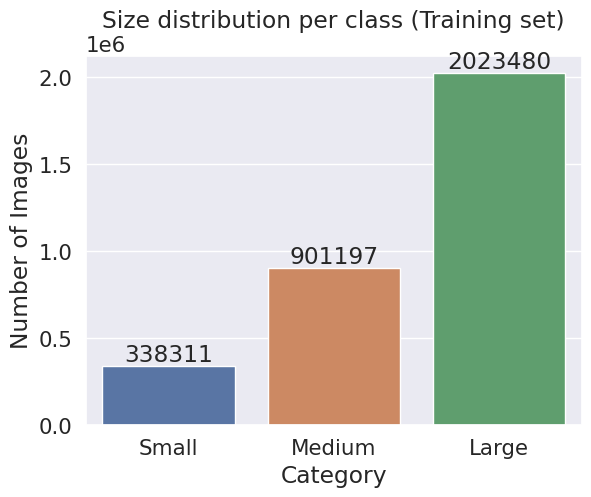

In [77]:
ax =sns.countplot(x=df6["area"])

# Set the plot title and labels
plt.title('Size distribution per class (Training set)')
plt.xlabel('Category')
plt.ylabel('Number of Images')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

# Show the plot
plt.show()

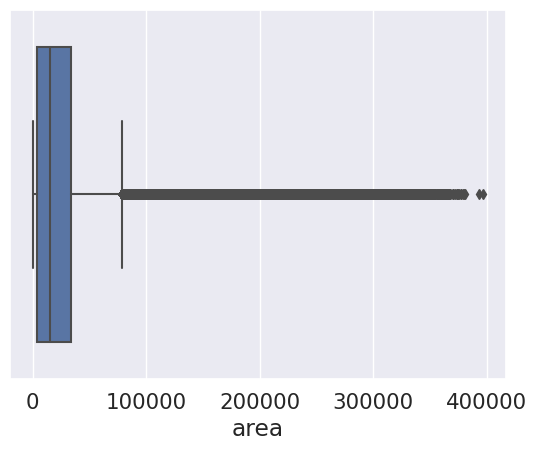

In [78]:
# setting the dimensions of the plot
# drawing the box plot
sns.boxplot(x = df['area'])
plt.show()


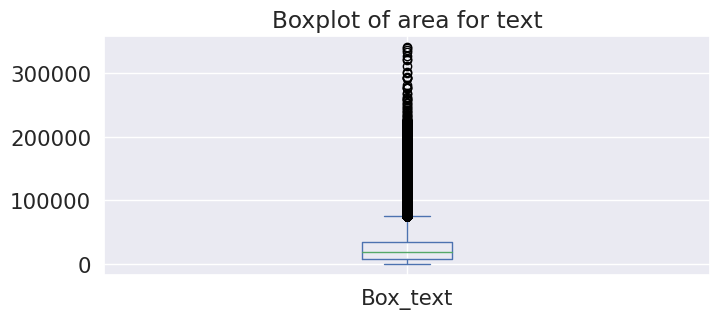

In [79]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_text": df.area[df.category_id==1].to_list()})

# Plot the dataframe
ax = data[['Box_text']].plot(kind='box', title='Boxplot of area for text')

# Display the plot
plt.show()

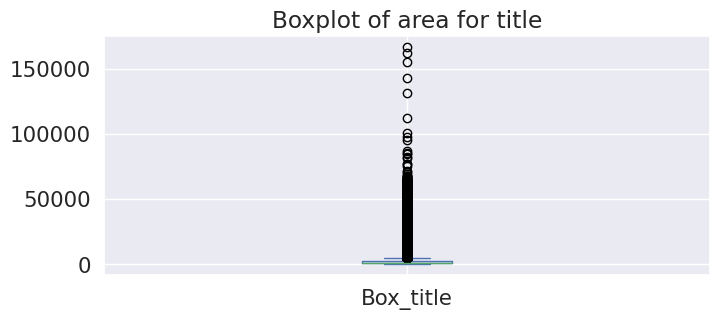

In [80]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_title": df.area[df.category_id==2].to_list()})

# Plot the dataframe
ax = data[['Box_title']].plot(kind='box', title='Boxplot of area for title')

# Display the plot
plt.show()

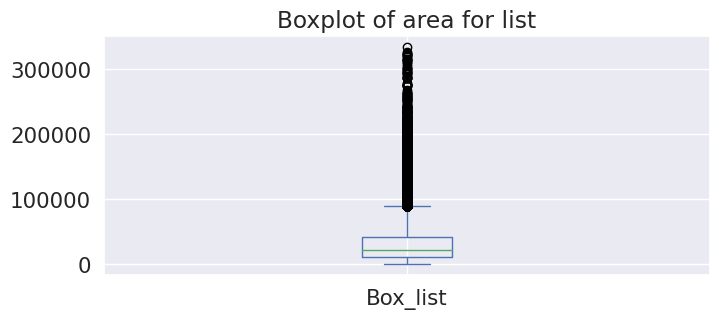

In [81]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_list": df.area[df.category_id==3].to_list()})

# Plot the dataframe
ax = data[['Box_list']].plot(kind='box', title='Boxplot of area for list')

# Display the plot
plt.show()

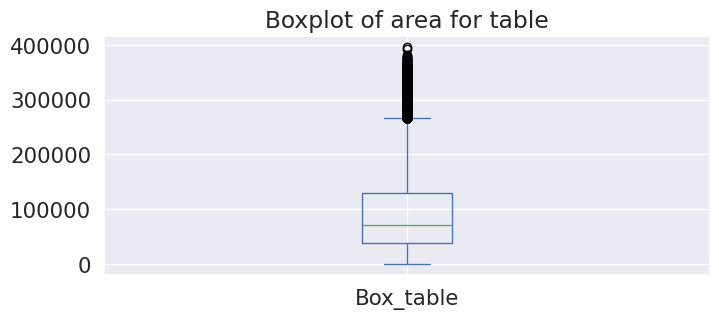

In [82]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_table": df.area[df.category_id==4].to_list()})

# Plot the dataframe
ax = data[['Box_table']].plot(kind='box', title='Boxplot of area for table')

# Display the plot
plt.show()

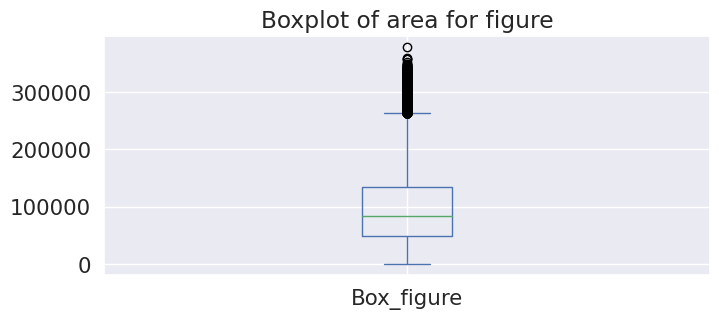

In [83]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_figure": df.area[df.category_id==5].to_list()})

# Plot the dataframe
ax = data[['Box_figure']].plot(kind='box', title='Boxplot of area for figure')

# Display the plot
plt.show()

In [84]:
df['bbox'][0][1]

444.87

In [85]:
# Copying the dataframe 
df8= df.copy().sample(n=1000)
df8.head()

index                                       segmentation  \
2987173  2987173  [[56.69, 386.93, 102.39, 386.93, 102.39, 397.3...   
27127      27127  [[111.84, 551.21, 497.44, 551.21, 497.44, 562....   
1419930  1419930  [[323.25, 66.51, 550.25, 66.51, 550.25, 77.08,...   
1499977  1499977  [[51.02, 486.29, 291.62, 486.29, 291.62, 501.3...   
2981159  2981159  [[150.0, 424.38, 186.59, 424.38, 186.59, 434.7...   

                 area  iscrowd  image_id                             bbox  \
2987173    477.172182        0    311139     [56.69, 386.93, 45.7, 10.44]   
27127    21631.421273        0      2925   [111.84, 551.21, 385.6, 58.34]   
1419930   4049.781486        0    148174    [323.25, 66.51, 227.0, 21.57]   
1499977  33623.725973        0    156581  [51.02, 486.29, 240.73, 140.09]   
2981159    379.642545        0    310497    [150.0, 424.38, 36.58, 10.38]   

         category_id       id category  
2987173            2  3031300    title  
27127              1    27513     text  
1419930            3  1442033     list  
1499977            1  1522986     text  
2981159            2  3025233    title

In [86]:
# Exploring the dataframe in the new column
x =df8['x_bbox']=df8.apply(lambda x: x['bbox'][0],axis=1)
x.head()

2987173     56.69
27127      111.84
1419930    323.25
1499977     51.02
2981159    150.00
dtype: float64

In [87]:
# Exploring the dataframe in the new column
y =df8['y_bbox']=df.apply(lambda x: x['bbox'][1],axis=1)
y.head()

0    444.87
1    444.91
2    507.66
3    465.80
4    397.09
dtype: float64

In [88]:
# Exploring the dataframe in the new column
h =df8['h_bbox']=df.apply(lambda x: x['bbox'][2],axis=1)
h.head()

0    251.55
1    251.55
2    251.55
3    251.55
4    521.02
dtype: float64

In [89]:
# Exploring the dataframe in the new column
w =df8['w_bbox']=df.apply(lambda x: x['bbox'][2],axis=1)
w.head()

0    251.55
1    251.55
2    251.55
3    251.55
4    521.02
dtype: float64

In [90]:
# Exploring the dataframe
df8.head()

index                                       segmentation  \
2987173  2987173  [[56.69, 386.93, 102.39, 386.93, 102.39, 397.3...   
27127      27127  [[111.84, 551.21, 497.44, 551.21, 497.44, 562....   
1419930  1419930  [[323.25, 66.51, 550.25, 66.51, 550.25, 77.08,...   
1499977  1499977  [[51.02, 486.29, 291.62, 486.29, 291.62, 501.3...   
2981159  2981159  [[150.0, 424.38, 186.59, 424.38, 186.59, 434.7...   

                 area  iscrowd  image_id                             bbox  \
2987173    477.172182        0    311139     [56.69, 386.93, 45.7, 10.44]   
27127    21631.421273        0      2925   [111.84, 551.21, 385.6, 58.34]   
1419930   4049.781486        0    148174    [323.25, 66.51, 227.0, 21.57]   
1499977  33623.725973        0    156581  [51.02, 486.29, 240.73, 140.09]   
2981159    379.642545        0    310497    [150.0, 424.38, 36.58, 10.38]   

         category_id       id category  x_bbox  y_bbox  h_bbox  w_bbox  
2987173            2  3031300    title   56.69  386.93   45.70   45.70  
27127              1    27513     text  111.84  551.21  385.60  385.60  
1419930            3  1442033     list  323.25   66.51  227.00  227.00  
1499977            1  1522986     text   51.02  486.29  240.73  240.73  
2981159            2  3025233    title  150.00  424.38   36.58   36.58

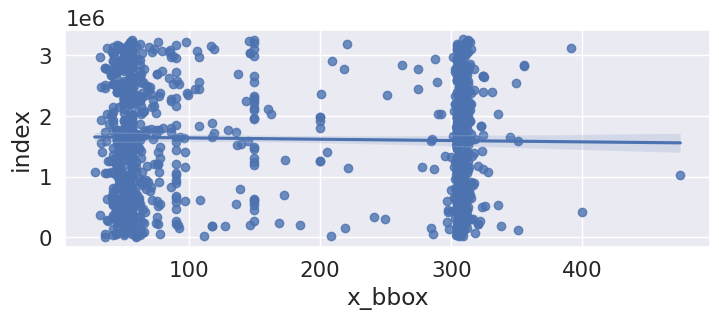

In [91]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["x_bbox"], y=df8["index"], fit_reg=True);

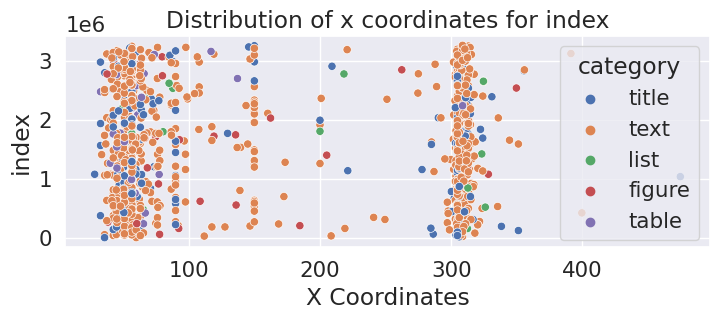

In [92]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="x_bbox", y="index", hue="category")
plt.title('Distribution of x coordinates for index')
plt.xlabel('X Coordinates')
plt.ylabel('index')
# Show the plot
plt.show()

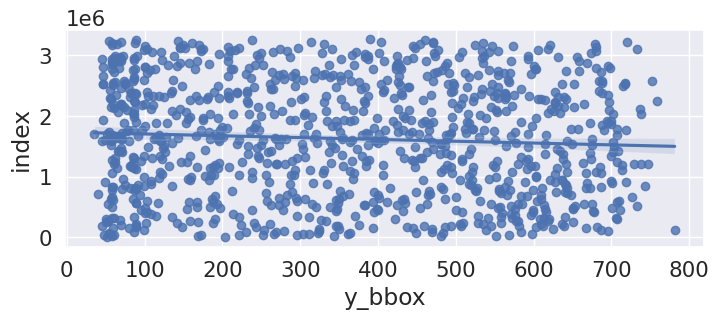

In [93]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["y_bbox"], y=df8["index"], fit_reg=True);

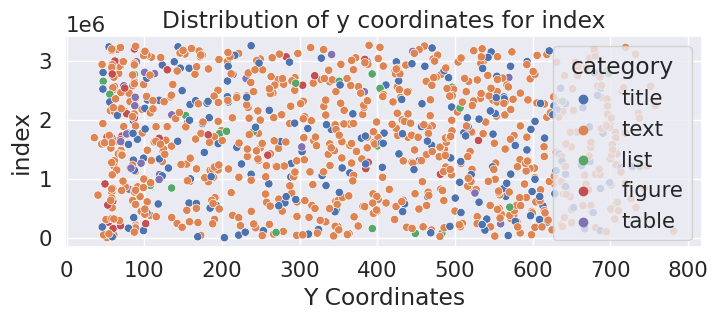

In [94]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="y_bbox", y="index", hue="category")
plt.title('Distribution of y coordinates for index')
plt.xlabel('Y Coordinates')
plt.ylabel('index')
# Show the plot
plt.show()

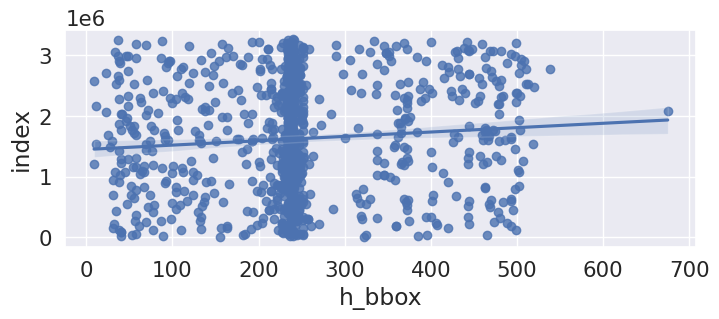

In [95]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["h_bbox"], y=df8["index"], fit_reg=True);

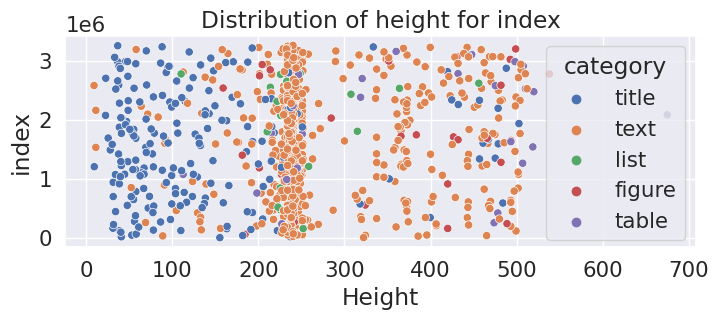

In [96]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="h_bbox", y="index", hue="category")
plt.title('Distribution of height for index')
plt.xlabel('Height')
plt.ylabel('index')
# Show the plot
plt.show()

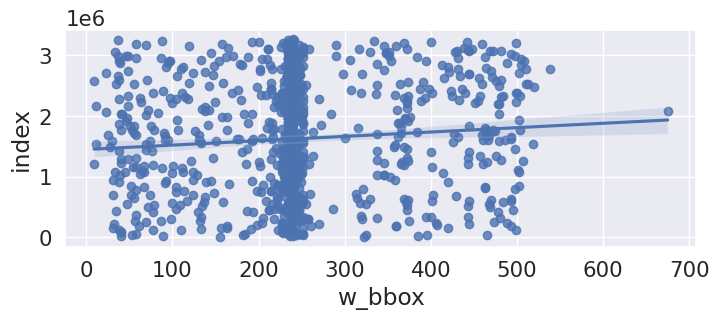

In [97]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["w_bbox"], y=df8["index"], fit_reg=True);

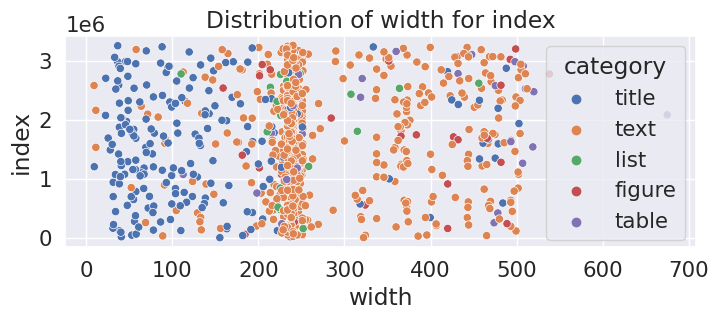

In [98]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="w_bbox", y="index", hue="category")

plt.title('Distribution of width for index')
plt.xlabel('width')
plt.ylabel('index')
# Show the plot
plt.show()

# Exploring the validation dataset

### Loading PubLayNet from the Web

In [99]:
import json
f = open('/content/publaynet/val.json',)
data = json.load(f)
f.close()

In [100]:
thing_classes  = []
category_name_to_id = {}
id_num =[]
id_to_category_name ={}
data_annotations=[]
for i in data['categories']:
    thing_classes.append(i['name'])
    category_name_to_id[i['name']]=i['id']
print(category_name_to_id)
print(thing_classes)

{'text': 1, 'title': 2, 'list': 3, 'table': 4, 'figure': 5}
['text', 'title', 'list', 'table', 'figure']


In [101]:
id_to_category_name = {v: k for k, v in category_name_to_id.items()}
id_to_category_name

{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}

In [102]:
category  = []
category_name_to_id = {}
data_annotations=[]

for i in data['annotations']:
    category.append(id_to_category_name[i['category_id']] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# category

In [103]:
category_name_to_id = {}


In [104]:
len(category)

120761

In [105]:
import pandas as pd
category =pd.Index(category)
category.value_counts()


text      88625
title     18801
table      4769
figure     4327
list       4239
dtype: int64

<Axes: >

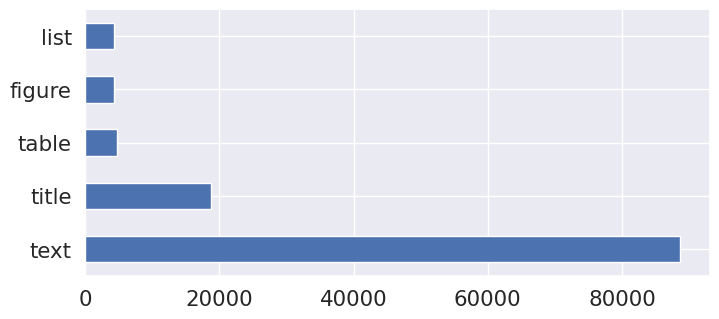

In [106]:
category.value_counts().plot(kind='barh')


(Text(0.5, 1.08, 'Instance Class Distribution (Validation set)'),)

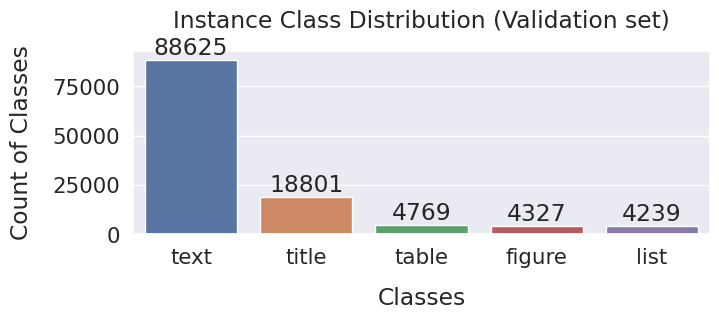

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

ax =sns.barplot(x=category.value_counts().index, y=category.value_counts())
plt.ylabel("Count of Classes", labelpad=14)
plt.xlabel("Classes", labelpad=14)
plt.ticklabel_format(style='plain', axis='y')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

plt.title('Instance Class Distribution (Validation set)', y=1.08),

In [108]:
area  = []
area_to_id = {}
data_annotations=[]

for i in data['annotations']:
    area.append(i['area'] )
    # print(i)
    # category_name_to_id[i['category_id']]=i['id']
# area

In [109]:
len(area)

120761

In [110]:
import seaborn as sns
import pandas as pd
bins = [ 0, 32*32, 92*92, 10000000 ]
df = pd.DataFrame(area, columns=['area'])

df['area'] = pd.cut(df['area'] , bins=bins, include_lowest=True)
# plt.hist(df['bin_cut_manual'])
plt.show()


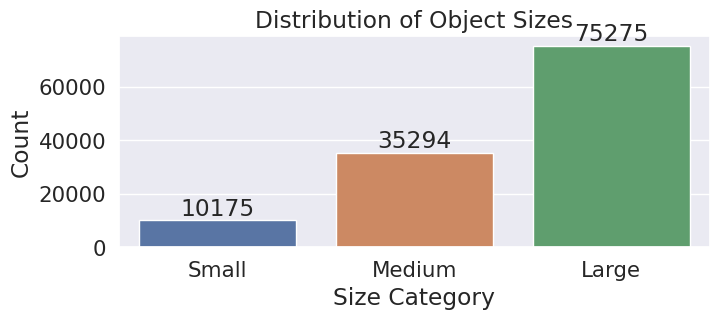

In [111]:
# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

df = pd.DataFrame(area, columns=['area'])

# Categorize the sizes using pd.cut()
df['area'] = pd.cut(df['area'], bins=bins, labels=labels)


# Create a countplot using Seaborn
ax =sns.barplot(x=df['area'].value_counts().index, y=df['area'].value_counts())


# Set the plot title and labels
plt.title('Distribution of Object Sizes')
plt.xlabel('Size Category')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])


# Show the plot
plt.show()

In [112]:
df['area'].value_counts()

Large     75275
Medium    35294
Small     10175
Name: area, dtype: int64

## Validation dataframe

In [113]:
# Converting it to dataframe for better visualization of data
import json
f = open('/content/publaynet/val.json',)

dict = json.load(f)
f.close()


from pandas import json_normalize
df = json_normalize(dict['annotations']) 



In [114]:
# Exploring the dataframe
df.head()

segmentation           area  iscrowd  \
0  [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043        0   
1  [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850        0   
2  [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704        0   
3  [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403        0   
4  [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097        0   

   image_id                              bbox  category_id       id modified  
0    341427   [50.58, 490.86, 240.15, 252.16]            1  3322348      NaN  
1    341427  [308.61, 490.87, 240.19, 252.16]            1  3322349      NaN  
2    341427     [149.68, 70.61, 299.87, 12.1]            1  3322350      NaN  
3    341427     [50.58, 395.3, 498.13, 22.55]            1  3322351      NaN  
4    341427     [50.58, 89.6, 498.14, 282.98]            4  3322352      NaN

In [115]:
# dict['annotations']

In [116]:
# Exploring the dataframe in the area column
df["area"].head()

0     60518.099043
1     60379.185850
2      3627.124704
3      9553.281403
4    140964.659097
Name: area, dtype: float64

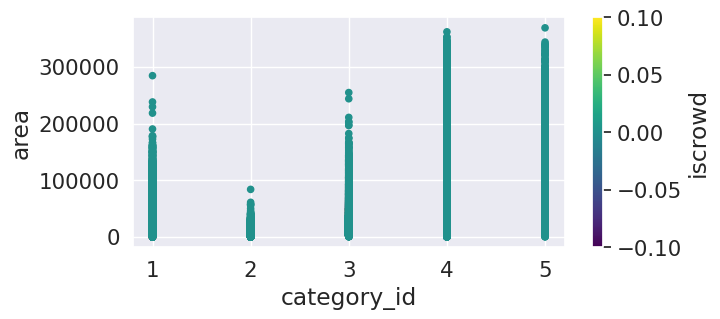

In [117]:
ax2 = df.plot.scatter(x='category_id',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

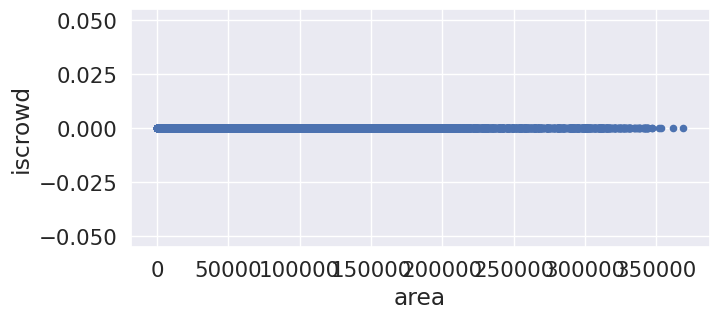

In [118]:
ax2 = df.plot.scatter(x='area',
                      y='iscrowd'
                      # , c='species'
                      # , colormap='viridis'
                      )

In [119]:
df

segmentation           area  \
0       [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043   
1       [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850   
2       [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704   
3       [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403   
4       [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097   
...                                                   ...            ...   
120756  [[50.76, 157.43, 543.84, 157.43, 543.84, 176.7...   14644.159811   
120757  [[50.76, 447.68, 128.43, 447.68, 128.43, 460.5...    1000.081923   
120758  [[50.76, 687.2, 206.09, 687.2, 206.09, 700.07,...    3227.591577   
120759  [[86.64, 269.6, 352.93, 269.6, 352.93, 279.12,...    2535.080800   
120760  [[86.64, 288.92, 361.56, 288.92, 361.56, 298.4...    2617.238400   

        iscrowd  image_id                              bbox  category_id  \
0             0    341427   [50.58, 490.86, 240.15, 252.16]            1   
1             0    341427  [308.61, 490.87, 240.19, 252.16]            1   
2             0    341427     [149.68, 70.61, 299.87, 12.1]            1   
3             0    341427     [50.58, 395.3, 498.13, 22.55]            1   
4             0    341427     [50.58, 89.6, 498.14, 282.98]            4   
...         ...       ...                               ...          ...   
120756        0    428218    [50.76, 157.43, 493.08, 39.23]            2   
120757        0    428218     [50.76, 447.68, 77.67, 12.88]            2   
120758        0    428218     [50.76, 687.2, 155.33, 26.32]            2   
120759        0    428218      [86.64, 269.6, 266.29, 9.52]            1   
120760        0    428218     [86.64, 288.92, 274.92, 9.52]            1   

             id modified  
0       3322348      NaN  
1       3322349      NaN  
2       3322350      NaN  
3       3322351      NaN  
4       3322352      NaN  
...         ...      ...  
120756  4196391      NaN  
120757  4196392      NaN  
120758  4196393      NaN  
120759  4199949      NaN  
120760  4199950      NaN  

[120761 rows x 8 columns]

In [120]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'index'})

In [121]:
# Checking dataframe after conversion
df.head()

index                                       segmentation           area  \
0      0  [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043   
1      1  [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850   
2      2  [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704   
3      3  [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403   
4      4  [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097   

   iscrowd  image_id                              bbox  category_id       id  \
0        0    341427   [50.58, 490.86, 240.15, 252.16]            1  3322348   
1        0    341427  [308.61, 490.87, 240.19, 252.16]            1  3322349   
2        0    341427     [149.68, 70.61, 299.87, 12.1]            1  3322350   
3        0    341427     [50.58, 395.3, 498.13, 22.55]            1  3322351   
4        0    341427     [50.58, 89.6, 498.14, 282.98]            4  3322352   

  modified  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [122]:
# df['category']= df['category_id'].replace({1:'Text',2:'Title',3:'List',4:'Table',5:'Figure'})


In [123]:
df['category']= df['category_id'].replace(id_to_category_name)


In [124]:
df['category']

0          text
1          text
2          text
3          text
4         table
          ...  
120756    title
120757    title
120758    title
120759     text
120760     text
Name: category, Length: 120761, dtype: object

In [125]:
# Exploring the dataframe 
df.head()

index                                       segmentation           area  \
0      0  [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043   
1      1  [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850   
2      2  [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704   
3      3  [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403   
4      4  [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097   

   iscrowd  image_id                              bbox  category_id       id  \
0        0    341427   [50.58, 490.86, 240.15, 252.16]            1  3322348   
1        0    341427  [308.61, 490.87, 240.19, 252.16]            1  3322349   
2        0    341427     [149.68, 70.61, 299.87, 12.1]            1  3322350   
3        0    341427     [50.58, 395.3, 498.13, 22.55]            1  3322351   
4        0    341427     [50.58, 89.6, 498.14, 282.98]            4  3322352   

  modified category  
0      NaN     text  
1      NaN     text  
2      NaN     text  
3      NaN     text  
4      NaN    table

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


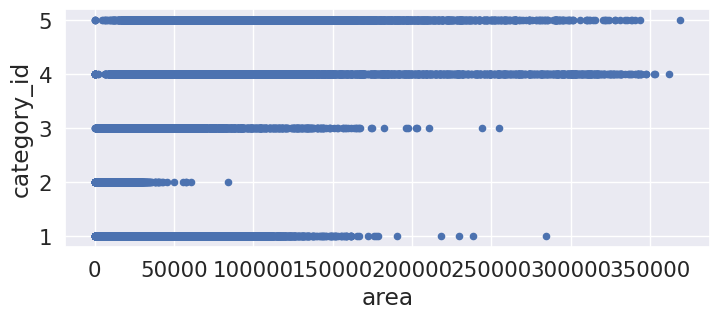

In [126]:
ax2 = df.plot.scatter(x='area',
                      y='category_id'
                      , colormap='viridis'
                      )

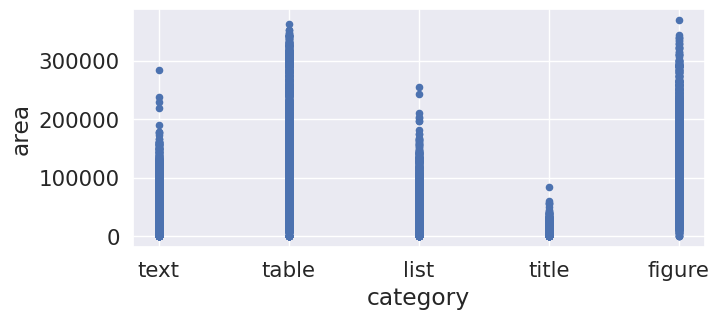

In [127]:
ax2 = df.plot.scatter(y='area',
                      x='category'
                      # , c='category'
                      , colormap='viridis'
                      )

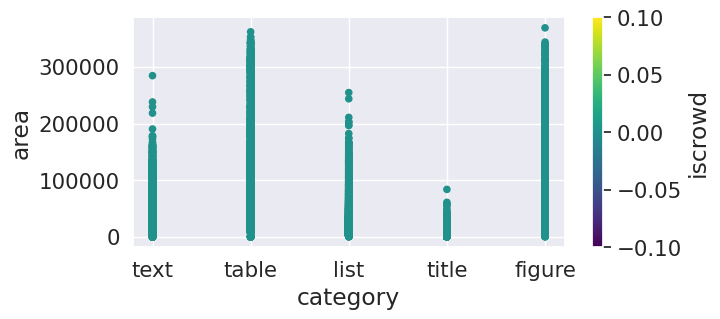

In [128]:
ax2 = df.plot.scatter(x='category',
                      y='area',
                      c='iscrowd',
                      colormap='viridis')

In [129]:
print(category_name_to_id)
print(id_to_category_name)


{}
{1: 'text', 2: 'title', 3: 'list', 4: 'table', 5: 'figure'}


In [130]:
# Counting number of images in each page
df.image_id.value_counts().head()

373288    59
403777    55
403785    48
403745    47
403779    39
Name: image_id, dtype: int64

In [131]:
# Number of images in each pages
df2 = df.pivot_table(index = ['image_id'], aggfunc ='size')
df2.head()

image_id
341427     6
341435    27
341436    15
341441    11
341443    16
dtype: int64

In [132]:
# Exploring the images in each page
df3 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='size')
(df3).head()

image_id  category
341427    table        2
          text         4
341435    list         2
          text        22
          title        3
dtype: int64

In [133]:
# Exploring the dataframe in the pivot table
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')
(df4).head()

<ipython-input-133-6968093b2f9d>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum')


area  category_id        id  index  iscrowd
image_id category                                                      
341427   table     160600.261130            8   6644705      9        0
         text      134077.691000            4  13289398      6        0
341435   list       31073.097683            6   6644919     57        0
         text      210960.918927           22  73093845    363        0
         title       3115.812097            6   9967386     93        0

In [134]:
# Exploring the dataframe in the pivot table
df4 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='count')
# df4.drop('id')
df4.head()

area  bbox  category_id  id  index  iscrowd  modified  \
image_id category                                                          
341427   table        2     2            2   2      2        2         0   
         text         4     4            4   4      4        4         0   
341435   list         2     2            2   2      2        2         0   
         text        22    22           22  22     22       22         0   
         title        3     3            3   3      3        3         0   

                   segmentation  
image_id category                
341427   table                2  
         text                 4  
341435   list                 2  
         text                22  
         title                3

In [135]:
# Exploring the dataframe in the pivot table
df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')
df5.head()


<ipython-input-135-cf2fb94325fe>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['category_id', 'category'], aggfunc ='sum')


area            id     image_id       index  \
category_id category                                                        
1           text      1.882390e+09  333599801890  34042842684  5466622726   
2           title     5.245039e+07   70454338457   7210790039  1158561796   
3           list      1.317578e+08   15802943962   1614295339   210510521   
4           table     4.443636e+08   17945853508   1838759505   243456040   
5           figure    4.237421e+08   16218567325   1662126380   212398097   

                      iscrowd  
category_id category           
1           text            0  
2           title           0  
3           list            0  
4           table           0  
5           figure          0

In [136]:
df.head()

index                                       segmentation           area  \
0      0  [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043   
1      1  [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850   
2      2  [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704   
3      3  [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403   
4      4  [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097   

   iscrowd  image_id                              bbox  category_id       id  \
0        0    341427   [50.58, 490.86, 240.15, 252.16]            1  3322348   
1        0    341427  [308.61, 490.87, 240.19, 252.16]            1  3322349   
2        0    341427     [149.68, 70.61, 299.87, 12.1]            1  3322350   
3        0    341427     [50.58, 395.3, 498.13, 22.55]            1  3322351   
4        0    341427     [50.58, 89.6, 498.14, 282.98]            4  3322352   

  modified category  
0      NaN     text  
1      NaN     text  
2      NaN     text  
3      NaN     text  
4      NaN    table

In [137]:
import numpy as np

df.pivot(index=['index']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list          table          text  title
index                                                     
0            0.0   0.0       0.000000  60518.099043    0.0
1            0.0   0.0       0.000000  60379.185850    0.0
2            0.0   0.0       0.000000   3627.124704    0.0
3            0.0   0.0       0.000000   9553.281403    0.0
4            0.0   0.0  140964.659097      0.000000    0.0

In [138]:
df.pivot(index=['id']
, columns='category'
, values='area'
).replace(np.nan, 0).head()

category  figure  list          table          text  title
id                                                        
3322348      0.0   0.0       0.000000  60518.099043    0.0
3322349      0.0   0.0       0.000000  60379.185850    0.0
3322350      0.0   0.0       0.000000   3627.124704    0.0
3322351      0.0   0.0       0.000000   9553.281403    0.0
3322352      0.0   0.0  140964.659097      0.000000    0.0

In [139]:
df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)
(df5).drop(["iscrowd", "index","category_id","id"], axis = 1).head()

<ipython-input-139-0938ce8418e0>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id', 'category'], aggfunc ='sum').replace(np.nan, 0)


area
image_id category               
341427   table     160600.261130
         text      134077.691000
341435   list       31073.097683
         text      210960.918927
         title       3115.812097

In [140]:
df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)
df5.drop(["iscrowd", "index","category_id","id"], axis = 1)


<ipython-input-140-0a6423c93f4a>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df5 = df.pivot_table(index = ['image_id'],columns='category', aggfunc ='sum').replace(np.nan, 0)


area                                              \
category        figure          list          table           text   
image_id                                                             
341427        0.000000      0.000000  160600.261130  134077.691000   
341435        0.000000  31073.097683       0.000000  210960.918927   
341436        0.000000      0.000000  107876.430909  182780.072572   
341441        0.000000      0.000000   80836.798881  218003.086191   
341443        0.000000      0.000000   43942.234668  217532.945158   
...                ...           ...            ...            ...   
428168        0.000000      0.000000       0.000000  173217.399786   
428171        0.000000      0.000000   59246.726724  230802.964550   
428200        0.000000      0.000000       0.000000  182779.810004   
428202    86256.463703      0.000000       0.000000  161455.561215   
428218        0.000000      0.000000       0.000000  170110.387598   

                        
category         title  
image_id                
341427        0.000000  
341435     3115.812097  
341436        0.000000  
341441      864.360861  
341443     1353.687654  
...                ...  
428168    12358.256126  
428171      855.833161  
428200    10504.056850  
428202        0.000000  
428218    18871.833311  

[11245 rows x 5 columns]

In [141]:
# Exploring the dataframe
df.head()


index                                       segmentation           area  \
0      0  [[50.58, 490.86, 290.69, 490.86, 290.69, 502.2...   60518.099043   
1      1  [[323.56, 490.87, 548.71, 490.87, 548.71, 502....   60379.185850   
2      2  [[149.68, 70.61, 449.55, 70.61, 449.55, 82.71,...    3627.124704   
3      3  [[50.58, 395.3, 548.71, 395.3, 548.71, 407.39,...    9553.281403   
4      4  [[50.58, 89.6, 548.72, 89.6, 548.72, 372.58, 5...  140964.659097   

   iscrowd  image_id                              bbox  category_id       id  \
0        0    341427   [50.58, 490.86, 240.15, 252.16]            1  3322348   
1        0    341427  [308.61, 490.87, 240.19, 252.16]            1  3322349   
2        0    341427     [149.68, 70.61, 299.87, 12.1]            1  3322350   
3        0    341427     [50.58, 395.3, 498.13, 22.55]            1  3322351   
4        0    341427     [50.58, 89.6, 498.14, 282.98]            4  3322352   

  modified category  
0      NaN     text  
1      NaN     text  
2      NaN     text  
3      NaN     text  
4      NaN    table

In [142]:
df6 = pd.DataFrame(df[['area','category']])
df6

area category
0        60518.099043     text
1        60379.185850     text
2         3627.124704     text
3         9553.281403     text
4       140964.659097    table
...               ...      ...
120756   14644.159811    title
120757    1000.081923    title
120758    3227.591577    title
120759    2535.080800     text
120760    2617.238400     text

[120761 rows x 2 columns]

In [143]:
df5=df6.copy()

In [144]:
df6['category'].value_counts()

text      88625
title     18801
table      4769
figure     4327
list       4239
Name: category, dtype: int64

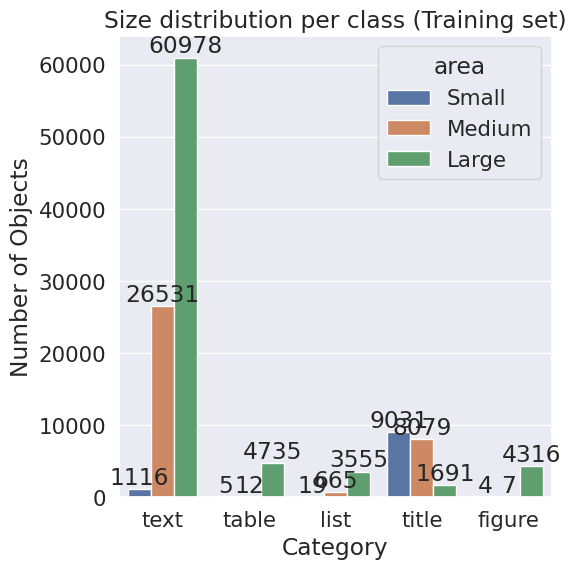

In [145]:

# Define the size categories
bins = [0, 32*32, 92*92, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Categorize the sizes using pd.cut()
df6['area'] = pd.cut(df6['area'], bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(6, 6))

# Create a countplot using Seaborn
ax =sns.countplot(data=df6, x="category", hue="area")


# Set the plot title and labels
plt.title('Size distribution per class (Training set)')
plt.xlabel('Category')
plt.ylabel('Number of Objects')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])
ax.bar_label(ax.containers[1], labels=[f'{x.get_height():.0f}' for x in ax.containers[1]])
ax.bar_label(ax.containers[2], labels=[f'{x.get_height():.0f}' for x in ax.containers[2]])

# Show the plot
plt.show()

In [146]:
df6

area category
0        Large     text
1        Large     text
2       Medium     text
3        Large     text
4        Large    table
...        ...      ...
120756   Large    title
120757   Small    title
120758  Medium    title
120759  Medium     text
120760  Medium     text

[120761 rows x 2 columns]

In [147]:
df6["area"].value_counts()

Large     75275
Medium    35294
Small     10175
Name: area, dtype: int64

In [148]:
df5

area category
0        60518.099043     text
1        60379.185850     text
2         3627.124704     text
3         9553.281403     text
4       140964.659097    table
...               ...      ...
120756   14644.159811    title
120757    1000.081923    title
120758    3227.591577    title
120759    2535.080800     text
120760    2617.238400     text

[120761 rows x 2 columns]

In [149]:
df5

area category
0        60518.099043     text
1        60379.185850     text
2         3627.124704     text
3         9553.281403     text
4       140964.659097    table
...               ...      ...
120756   14644.159811    title
120757    1000.081923    title
120758    3227.591577    title
120759    2535.080800     text
120760    2617.238400     text

[120761 rows x 2 columns]

In [150]:
df5

area category
0        60518.099043     text
1        60379.185850     text
2         3627.124704     text
3         9553.281403     text
4       140964.659097    table
...               ...      ...
120756   14644.159811    title
120757    1000.081923    title
120758    3227.591577    title
120759    2535.080800     text
120760    2617.238400     text

[120761 rows x 2 columns]

In [151]:
df7 = df5.pivot_table(index = ['category'], aggfunc ='sum')
df7

area
category              
figure    4.237421e+08
list      1.317578e+08
table     4.443636e+08
text      1.882390e+09
title     5.245039e+07

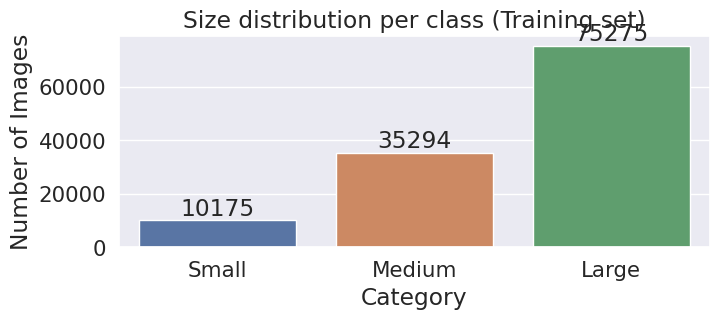

In [152]:
ax =sns.countplot(x=df6["area"])

# Set the plot title and labels
plt.title('Size distribution per class (Training set)')
plt.xlabel('Category')
plt.ylabel('Number of Images')

ax.bar_label(ax.containers[0], labels=[f'{x.get_height():.0f}' for x in ax.containers[0]])

# Show the plot
plt.show()

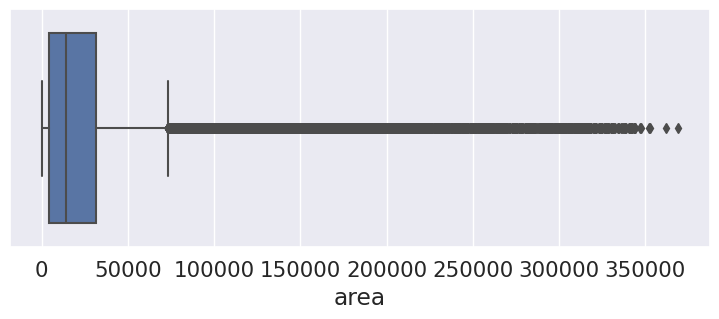

In [153]:
# setting the dimensions of the plot
# drawing the box plot
sns.boxplot(x = df['area'])
plt.show()


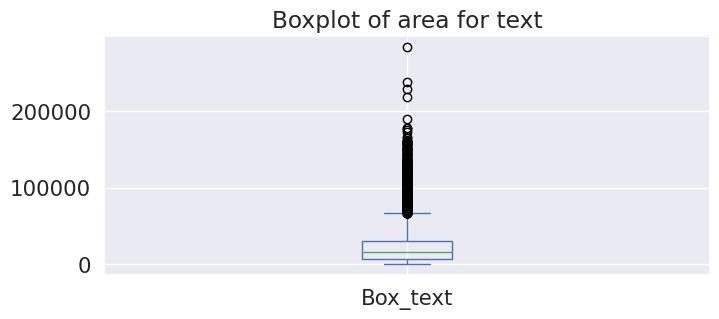

In [154]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_text": df.area[df.category_id==1].to_list()})

# Plot the dataframe
ax = data[['Box_text']].plot(kind='box', title='Boxplot of area for text')

# Display the plot
plt.show()

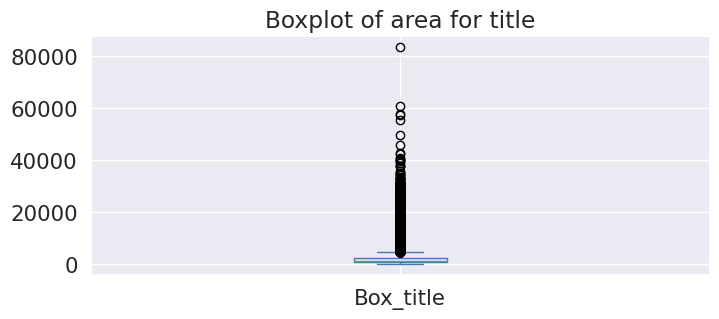

In [155]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_title": df.area[df.category_id==2].to_list()})

# Plot the dataframe
ax = data[['Box_title']].plot(kind='box', title='Boxplot of area for title')

# Display the plot
plt.show()

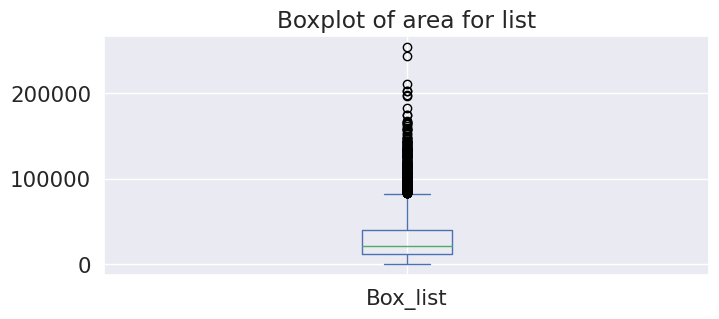

In [156]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_list": df.area[df.category_id==3].to_list()})

# Plot the dataframe
ax = data[['Box_list']].plot(kind='box', title='Boxplot of area for list')

# Display the plot
plt.show()

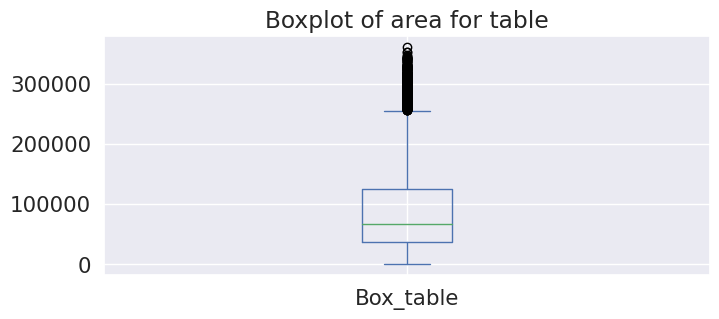

In [157]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_table": df.area[df.category_id==4].to_list()})

# Plot the dataframe
ax = data[['Box_table']].plot(kind='box', title='Boxplot of area for table')

# Display the plot
plt.show()

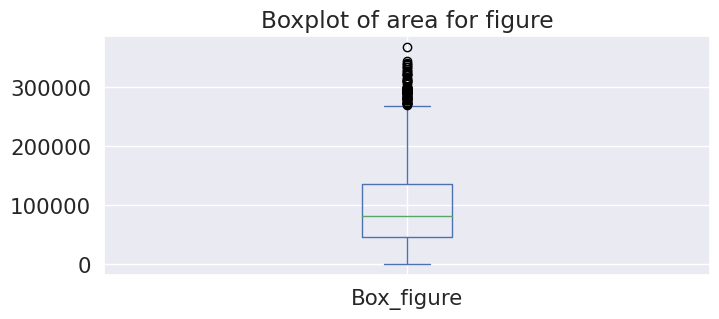

In [158]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box_figure": df.area[df.category_id==5].to_list()})

# Plot the dataframe
ax = data[['Box_figure']].plot(kind='box', title='Boxplot of area for figure')

# Display the plot
plt.show()

In [159]:
df['bbox'][0][1]

490.86

In [160]:
df8= df.sample(n = 1000).copy()

df8['category']= df8['category_id'].replace(id_to_category_name)
df8.head()

index                                       segmentation  \
11341    11341  [[85.04, 404.41, 310.25, 404.41, 310.25, 418.9...   
112373  112373  [[86.64, 248.43, 441.69, 248.43, 441.69, 261.8...   
51236    51236  [[304.72, 110.94, 538.56, 110.94, 538.56, 121....   
66718    66718  [[56.69, 195.49, 286.25, 195.49, 286.25, 203.9...   
91139    91139  [[54.61, 68.94, 540.61, 68.94, 540.61, 478.29,...   

                 area  iscrowd  image_id                             bbox  \
11341    41303.485714        0    351782  [70.87, 404.41, 242.02, 172.36]   
112373   12291.629413        0    401925   [86.64, 248.43, 385.03, 39.97]   
51236    21932.997708        0    387733  [304.72, 110.94, 233.92, 94.93]   
66718    13921.415044        0    403745    [56.69, 195.49, 233.67, 71.5]   
91139   198944.726057        0    423538    [54.61, 68.94, 486.0, 409.35]   

        category_id       id modified category  
11341             1  3424626      NaN     text  
112373            1  3917712      NaN     text  
51236             1  3784811      NaN     text  
66718             3  3937417    False     list  
91139             5  4151630      NaN   figure

In [161]:
x =df8['x_bbox']=df8.apply(lambda x: x['bbox'][0],axis=1)
x.head()

11341      70.87
112373     86.64
51236     304.72
66718      56.69
91139      54.61
dtype: float64

In [162]:
y =df8['y_bbox']=df.apply(lambda x: x['bbox'][1],axis=1)
y.head()

0    490.86
1    490.87
2     70.61
3    395.30
4     89.60
dtype: float64

In [163]:
h =df8['h_bbox']=df.apply(lambda x: x['bbox'][2],axis=1)
h.head()

0    240.15
1    240.19
2    299.87
3    498.13
4    498.14
dtype: float64

In [164]:
w =df8['w_bbox']=df.apply(lambda x: x['bbox'][2],axis=1)
w.head()

0    240.15
1    240.19
2    299.87
3    498.13
4    498.14
dtype: float64

In [165]:
df8.head()

index                                       segmentation  \
11341    11341  [[85.04, 404.41, 310.25, 404.41, 310.25, 418.9...   
112373  112373  [[86.64, 248.43, 441.69, 248.43, 441.69, 261.8...   
51236    51236  [[304.72, 110.94, 538.56, 110.94, 538.56, 121....   
66718    66718  [[56.69, 195.49, 286.25, 195.49, 286.25, 203.9...   
91139    91139  [[54.61, 68.94, 540.61, 68.94, 540.61, 478.29,...   

                 area  iscrowd  image_id                             bbox  \
11341    41303.485714        0    351782  [70.87, 404.41, 242.02, 172.36]   
112373   12291.629413        0    401925   [86.64, 248.43, 385.03, 39.97]   
51236    21932.997708        0    387733  [304.72, 110.94, 233.92, 94.93]   
66718    13921.415044        0    403745    [56.69, 195.49, 233.67, 71.5]   
91139   198944.726057        0    423538    [54.61, 68.94, 486.0, 409.35]   

        category_id       id modified category  x_bbox  y_bbox  h_bbox  w_bbox  
11341             1  3424626      NaN     text   70.87  404.41  242.02  242.02  
112373            1  3917712      NaN     text   86.64  248.43  385.03  385.03  
51236             1  3784811      NaN     text  304.72  110.94  233.92  233.92  
66718             3  3937417    False     list   56.69  195.49  233.67  233.67  
91139             5  4151630      NaN   figure   54.61   68.94  486.00  486.00

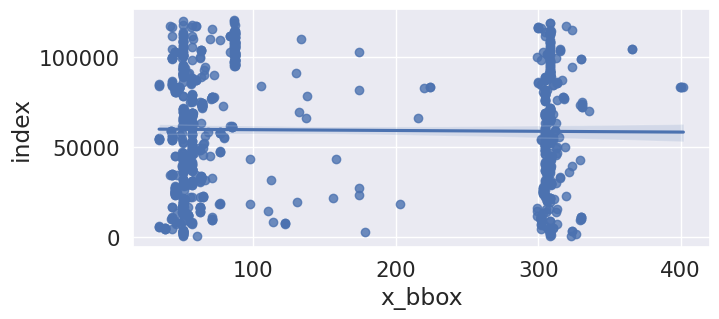

In [166]:
# Drawing a regression line for the bounding boxes
import random
sns.regplot(x=df8["x_bbox"], y=df8["index"], fit_reg=True);

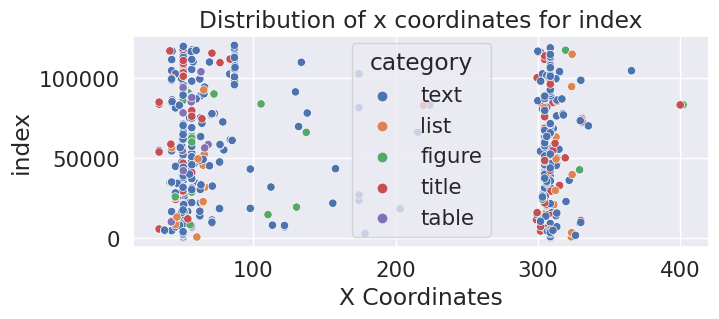

In [167]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="x_bbox", y="index", hue="category")
plt.title('Distribution of x coordinates for index')
plt.xlabel('X Coordinates')
plt.ylabel('index')
# Show the plot
plt.show()

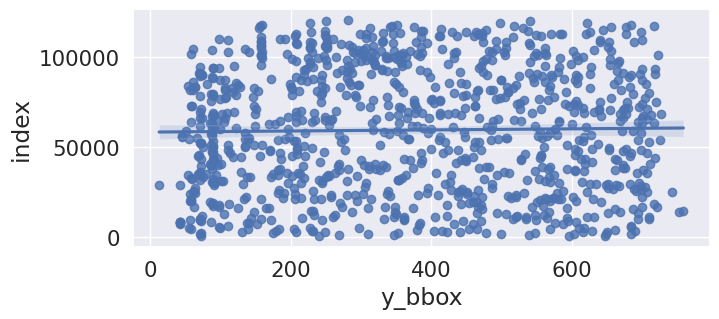

In [168]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["y_bbox"], y=df8["index"], fit_reg=True);

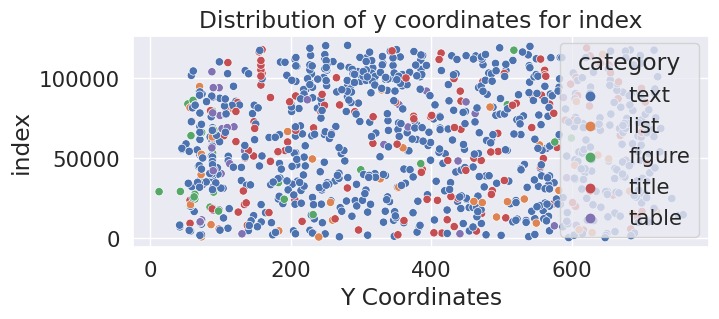

In [169]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="y_bbox", y="index", hue="category")
plt.title('Distribution of y coordinates for index')
plt.xlabel('Y Coordinates')
plt.ylabel('index')
# Show the plot
plt.show()

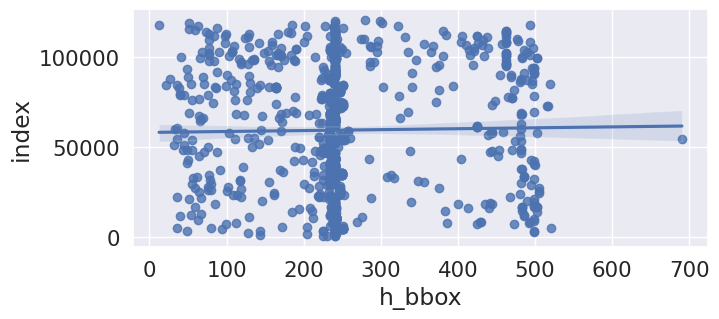

In [170]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["h_bbox"], y=df8["index"], fit_reg=True);

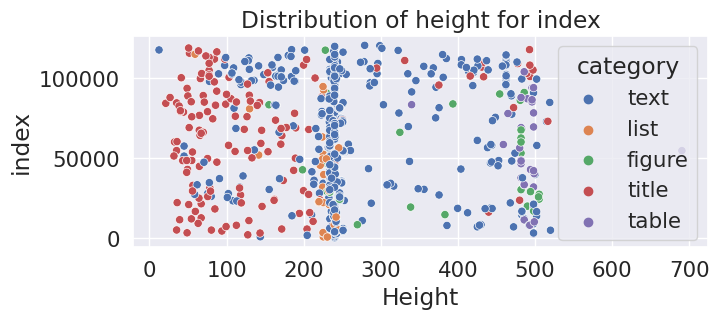

In [171]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="h_bbox", y="index", hue="category")
plt.title('Distribution of height for index')
plt.xlabel('Height')
plt.ylabel('index')
# Show the plot
plt.show()

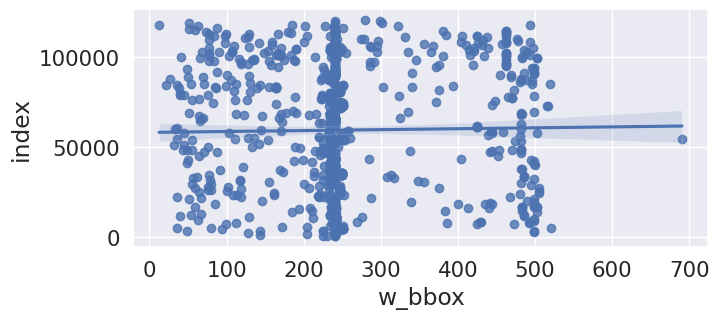

In [172]:
# Drawing a regression line for the bounding boxes
sns.regplot(x=df8["w_bbox"], y=df8["index"], fit_reg=True);

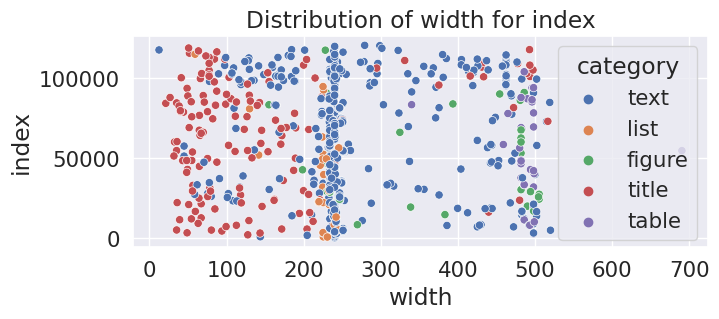

In [173]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.scatterplot(data=df8, x="w_bbox", y="index", hue="category")

plt.title('Distribution of width for index')
plt.xlabel('width')
plt.ylabel('index')
# Show the plot
plt.show()

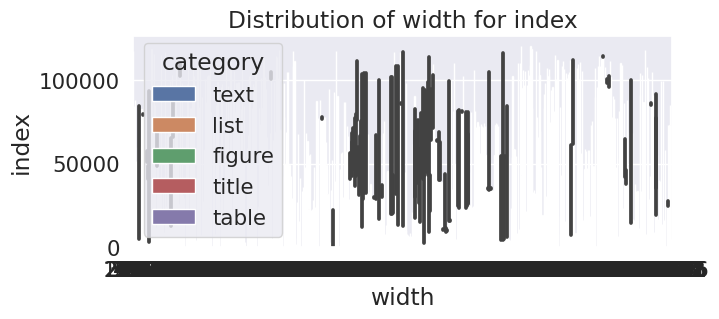

In [174]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.barplot(data=df8, x="w_bbox", y="index", hue="category")

plt.title('Distribution of width for index')
plt.xlabel('width')
plt.ylabel('index')
# Show the plot
plt.show()

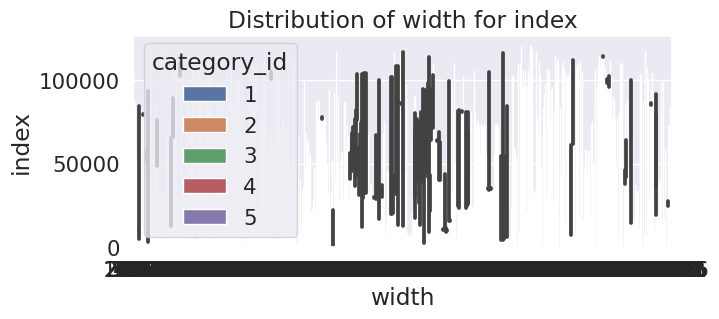

In [175]:
# Drawing the scatterplot of the coordinates of the data
ax =sns.barplot(data=df8, x="w_bbox", y="index", hue="category_id")

plt.title('Distribution of width for index')
plt.xlabel('width')
plt.ylabel('index')
# Show the plot
plt.show()

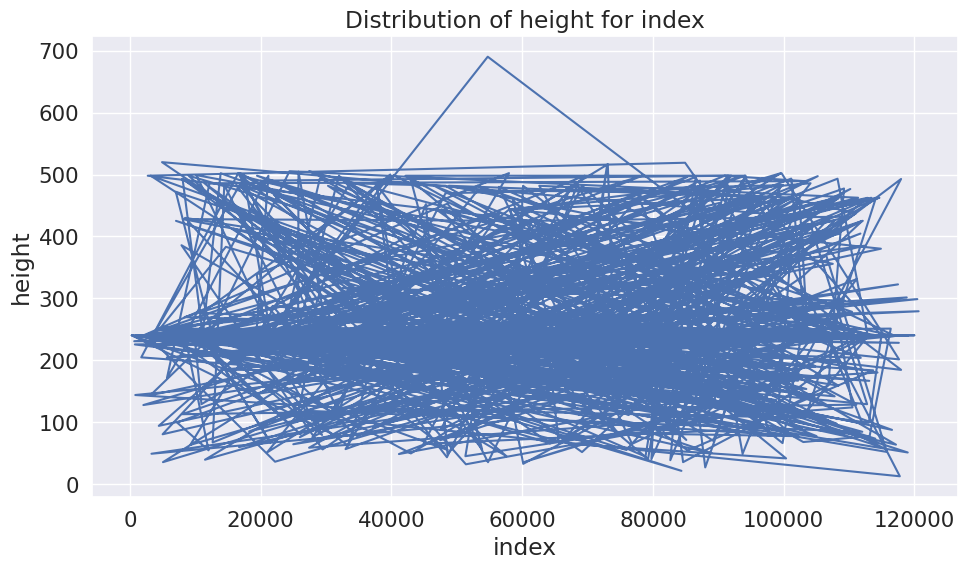

In [176]:
# import matplotlib.pyplot as plt

y= df8.h_bbox
x= df8.index
plt.figure(figsize=(10,6))
plt.plot(x,y)


plt.title('Distribution of height for index')
plt.ylabel('height')
plt.xlabel('index')
# plt.figure(figsize=(110,110))

plt.show()

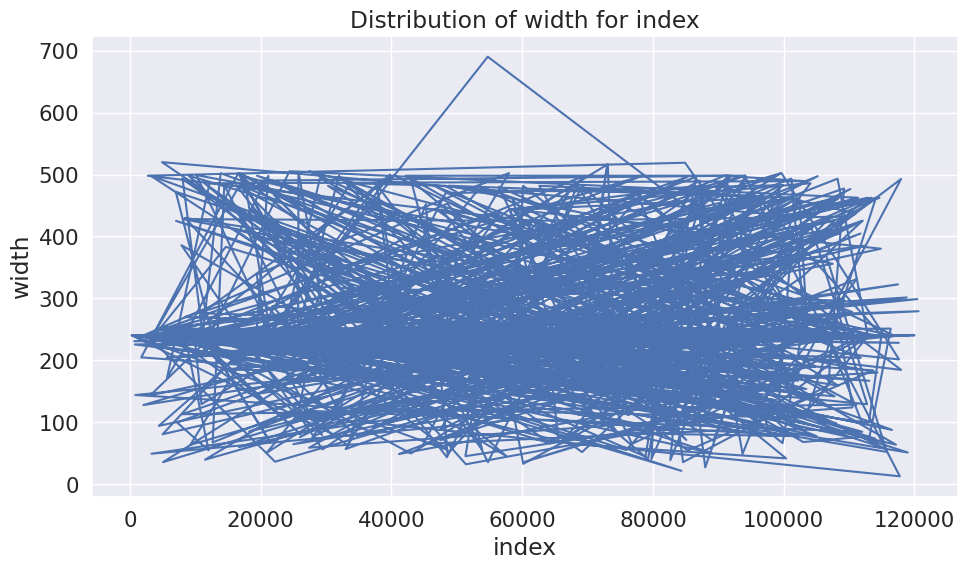

In [177]:
# import matplotlib.pyplot as plt

y= df8.w_bbox
x= df8.index
plt.figure(figsize=(10,6))
plt.plot(x,y)


plt.title('Distribution of width for index')
plt.ylabel('width')
plt.xlabel('index')
# plt.figure(figsize=(110,110))


plt.show()

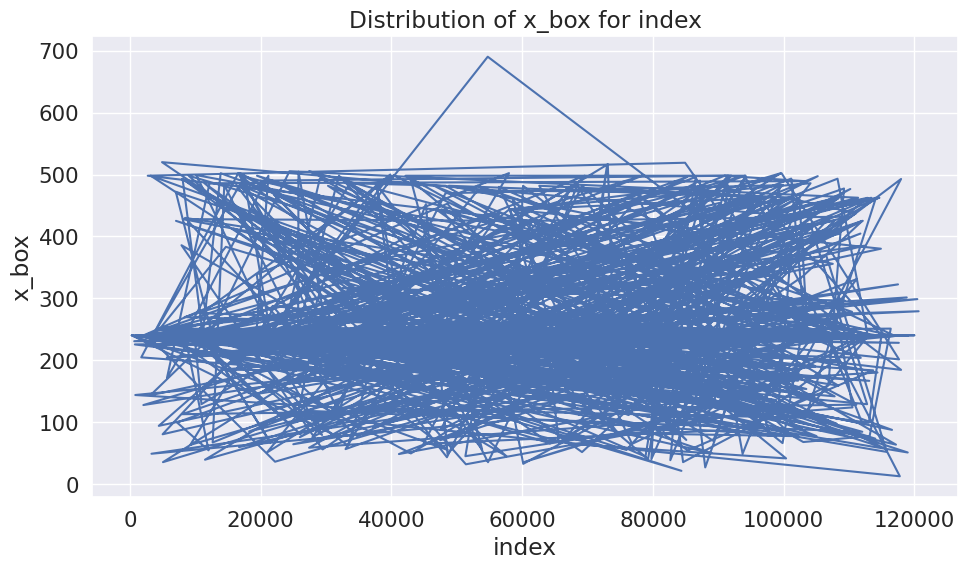

In [178]:
# import matplotlib.pyplot as plt

y= df8.h_bbox
x= df8.index
plt.figure(figsize=(10,6))
plt.plot(x,y)


plt.title('Distribution of x_box for index')
plt.ylabel('x_box')
plt.xlabel('index')
# plt.figure(figsize=(110,110))


plt.show()

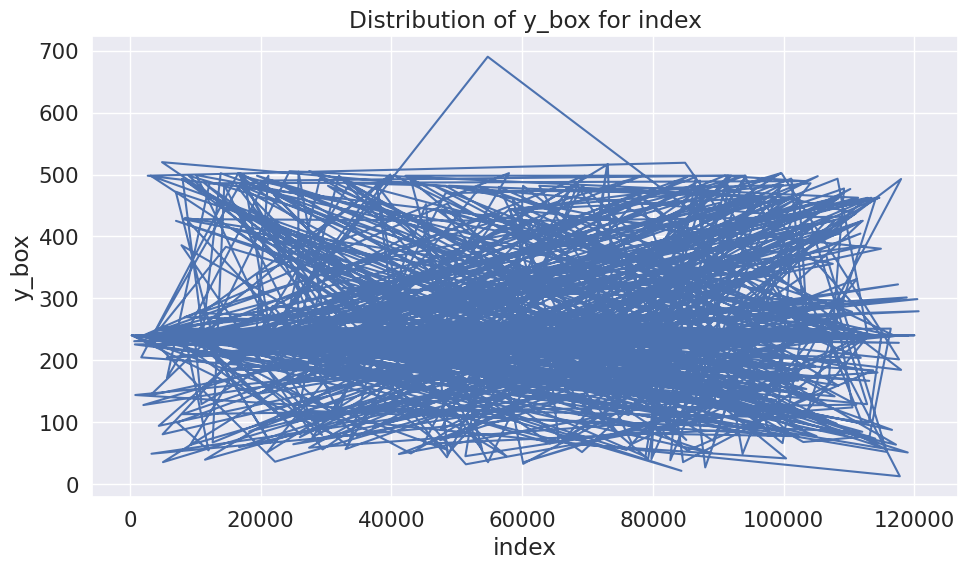

In [179]:
# import matplotlib.pyplot as plt

y= df8.h_bbox
x= df8.index
plt.figure(figsize=(10,6))
plt.plot(x,y)


plt.title('Distribution of y_box for index')
plt.ylabel('y_box')
plt.xlabel('index')
# plt.figure(figsize=(110,110))


plt.show()

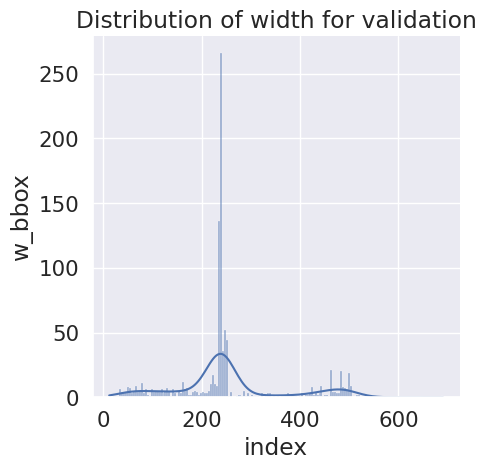

In [180]:
# Distribution of width of data
ax =sns.displot(data=df8, x="w_bbox",kde=True)
plt.title('Distribution of width for validation')
plt.ylabel('w_bbox')
plt.xlabel('index')
plt.show()

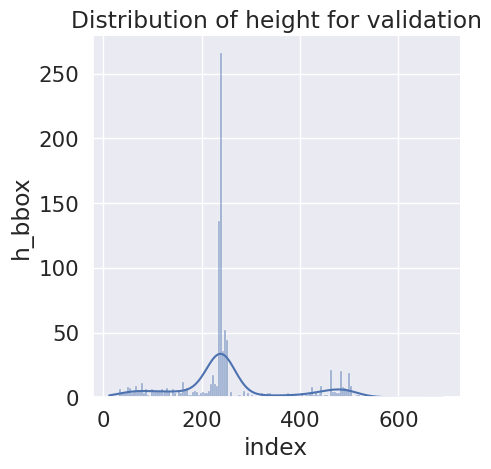

In [181]:
# Distribution of height of data
ax =sns.displot(data=df8, x="h_bbox",kde=True)
plt.title('Distribution of height for validation')
plt.ylabel('h_bbox')
plt.xlabel('index')
plt.show()

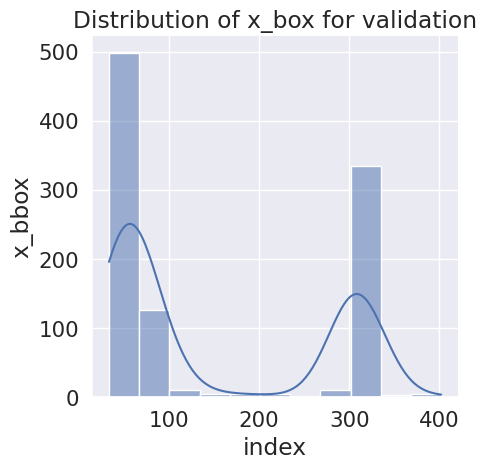

In [182]:
# Distribution of xbox of data
ax =sns.displot(data=df8, x="x_bbox",kde=True)
plt.title('Distribution of x_box for validation')
plt.ylabel('x_bbox')
plt.xlabel('index')
plt.show()

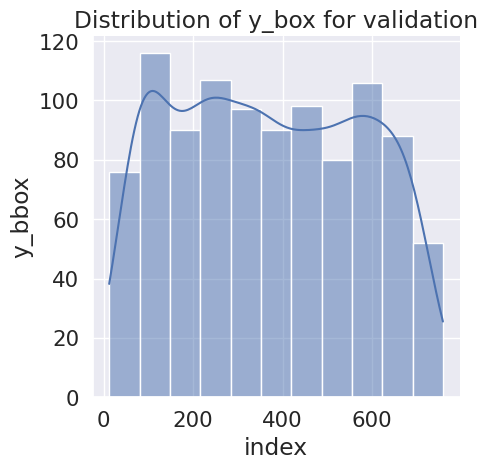

In [183]:
# Distribution of ybox of data
ax =sns.displot(data=df8, x="y_bbox",kde=True)
plt.title('Distribution of y_box for validation')
plt.ylabel('y_bbox')
plt.xlabel('index')
plt.show()

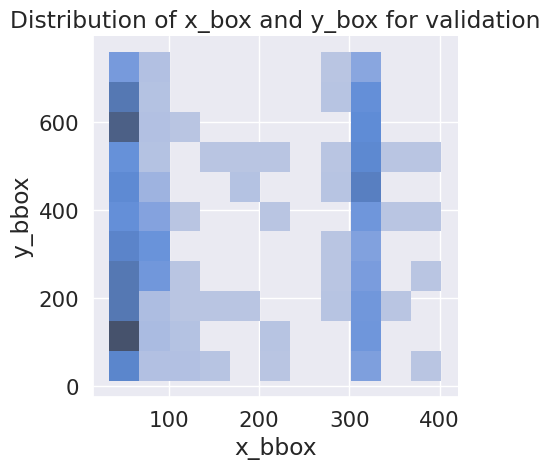

In [184]:
# Distribution of xbox and ybox of data
ax =sns.displot(data=df8, x="x_bbox",y="y_bbox")
plt.title('Distribution of x_box and y_box for validation')
plt.ylabel('y_bbox')
plt.xlabel('x_bbox')
plt.show()

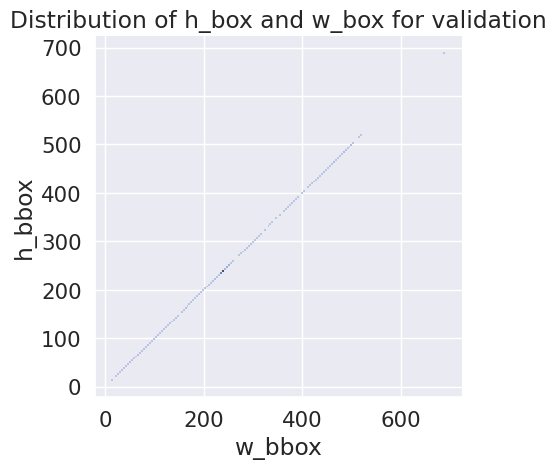

In [185]:
# Distribution of xbox and ybox of data
ax =sns.displot(data=df8, x="w_bbox",y="h_bbox")
plt.title('Distribution of h_box and w_box for validation')
plt.ylabel('h_bbox')
plt.xlabel('w_bbox')
plt.show()

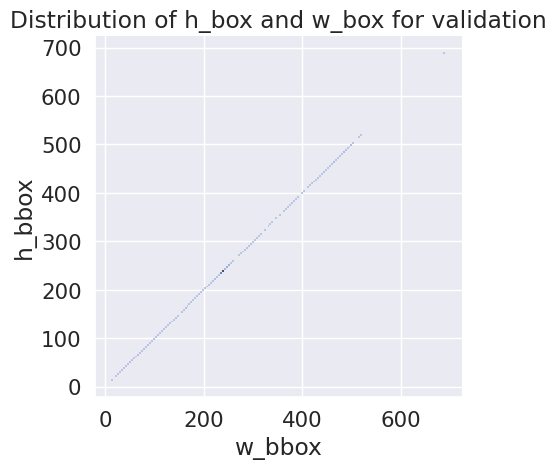

In [186]:
# Distribution of xbox and ybox of data
ax =sns.displot(data=df8, x="w_bbox",y="h_bbox")
plt.title('Distribution of h_box and w_box for validation')
plt.ylabel('h_bbox')
plt.xlabel('w_bbox')
plt.show()

<Axes: xlabel='y_bbox', ylabel='Count'>

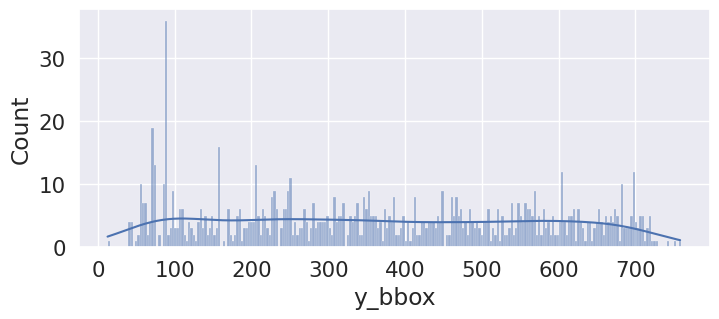

In [187]:
sns.histplot(data=df8, x="y_bbox",kde=True, binwidth=3)
# sns.displot(data=df8, x="y_bbox",kde=True)

